In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.model_selection import train_test_split


In [14]:
# Read the CSV file
df = pd.read_csv('data1.csv')
start_time = pd.Timestamp("2012-04-03 17:59:00", tz="UTC")
df["appear_time"] = start_time + pd.to_timedelta(df["appear_time"], unit="min")
print (df)
#location column
loc = df.columns[0]  
#print(df)
duplicate_counts = df.groupby(loc).size().reset_index(name="count")
# Filter to only show locations with more than 2 occurrence
duplicates = duplicate_counts[duplicate_counts['count'] >= 3]

# Sort by count in descending order
duplicates = duplicates.sort_values('count', ascending=False)

#print(duplicates)
target_locs = duplicates['location'].to_list()
# print(df_filtered)
# print(type(df_filtered))
filtered_data = df[df['location'] == 43]


print(filtered_data)

     location               appear_time  reward
0          38 2012-04-03 17:59:00+00:00       6
1          13 2012-04-03 17:59:00+00:00       8
2          38 2012-04-03 17:59:00+00:00       5
3          44 2012-04-03 17:59:00+00:00       8
4          43 2012-04-03 18:01:00+00:00       8
..        ...                       ...     ...
694        58 2012-04-03 23:27:00+00:00       8
695        43 2012-04-03 18:04:00+00:00       8
696        43 2012-04-03 20:51:00+00:00       7
697        49 2012-04-03 21:55:00+00:00       5
698        53 2012-04-03 22:40:00+00:00       8

[699 rows x 3 columns]
     location               appear_time  reward
4          43 2012-04-03 18:01:00+00:00       8
13         43 2012-04-03 18:04:00+00:00       6
28         43 2012-04-03 18:07:00+00:00       8
34         43 2012-04-03 18:08:00+00:00       9
38         43 2012-04-03 18:07:00+00:00       6
59         43 2012-04-03 18:02:00+00:00       6
67         43 2012-04-03 18:05:00+00:00       9
111        43 20

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:05 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 17:59:00  6.947429    5.125403    8.817940
1  2012-04-03 18:00:00  6.946465    5.076095    8.942916
2  2012-04-03 18:01:00  6.945500    5.006818    8.808222
3  2012-04-03 18:05:00  6.941642    5.186660    8.814687
4  2012-04-03 18:08:00  6.938749    5.010433    8.881685
5  2012-04-03 18:18:00  6.929104    5.146406    8.898965
6  2012-04-03 18:19:00  6.928140    5.039944    8.807070
7  2012-04-03 18:22:00  6.925246    5.091093    8.749495
8  2012-04-03 18:24:00  6.923317    5.021349    8.843778
9  2012-04-03 18:25:00  6.922353    5.090512    8.862946
10 2012-04-03 18:28:00  6.919459    5.117933    8.831419
11 2012-04-03 18:29:00  6.918495    5.031782    8.971431
12 2012-04-03 18:38:00  6.909815    4.793879    8.694862
13 2012-04-03 18:39:00  6.908850    4.894191    8.873018
14 2012-04-03 18:42:00  6.905957    4.917668    8.874257
15 2012-04-03 18:44:00  6.904028    4.968815    8.935015
16 2012-04-03 18:46:00  6.90209

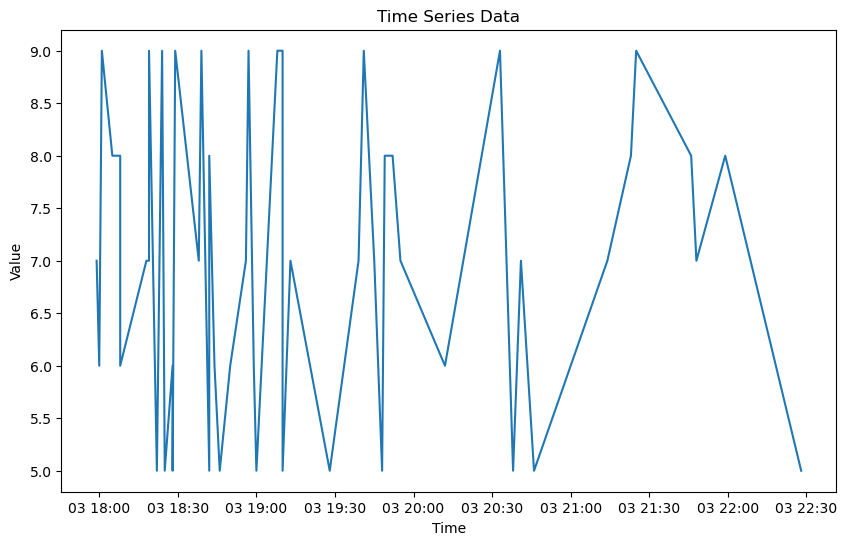

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:07 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:05:00  6.478657    4.685231    8.163777
1  2012-04-03 18:14:00  6.556256    4.704930    8.455356
2  2012-04-03 18:17:00  6.582122    4.759912    8.401862
3  2012-04-03 18:19:00  6.599367    4.746605    8.406665
4  2012-04-03 18:23:00  6.633855    4.839117    8.459000
5  2012-04-03 18:31:00  6.702832    5.022007    8.428056
6  2012-04-03 18:34:00  6.728699    4.916379    8.465125
7  2012-04-03 18:37:00  6.754565    4.903558    8.511074
8  2012-04-03 18:41:00  6.789053    5.020920    8.691099
9  2012-04-03 18:45:00  6.823542    5.031586    8.545858
10 2012-04-03 18:47:00  6.840786    4.891781    8.526240
11 2012-04-03 18:53:00  6.892519    4.881949    8.616004
12 2012-04-03 18:54:00  6.901141    5.181183    8.883372
13 2012-04-03 19:01:00  6.961496    5.126792    8.729326
14 2012-04-03 19:06:00  7.004606    5.264049    8.780094
15 2012-04-03 19:07:00  7.013229    5.268529    8.839683
16 2012-04-03 19:34:00  7.24602

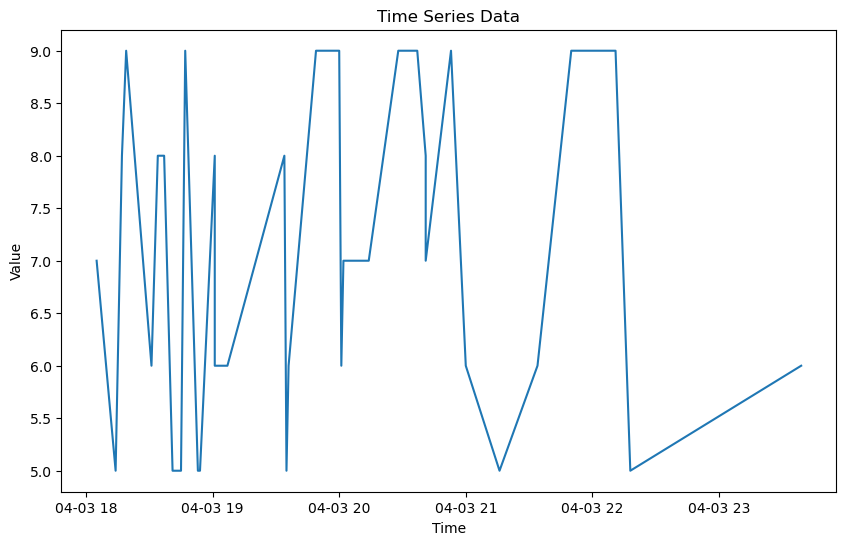

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:07 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 17:59:00  7.118210    5.365185    8.878570
1  2012-04-03 18:00:00  7.115124    5.352114    8.777227
2  2012-04-03 18:03:00  7.105867    5.457007    8.905399
3  2012-04-03 18:04:00  7.102781    5.360521    8.841307
4  2012-04-03 18:06:00  7.096609    5.248570    9.151193
5  2012-04-03 18:07:00  7.093523    5.312027    8.851651
6  2012-04-03 18:10:00  7.084266    5.476290    8.918029
7  2012-04-03 18:16:00  7.065751    5.195504    8.871058
8  2012-04-03 18:18:00  7.059580    5.236711    8.886041
9  2012-04-03 18:25:00  7.037979    5.268090    8.862162
10 2012-04-03 18:27:00  7.031808    5.184110    8.930368
11 2012-04-03 18:38:00  6.997864    5.396849    8.698281
12 2012-04-03 18:59:00  6.933063    5.150013    8.575292
13 2012-04-03 19:04:00  6.917634    5.158701    8.762115
14 2012-04-03 19:08:00  6.905292    5.051197    8.737400
15 2012-04-03 19:32:00  6.831242    5.073430    8.603204
16 2012-04-03 19:33:00  6.82815

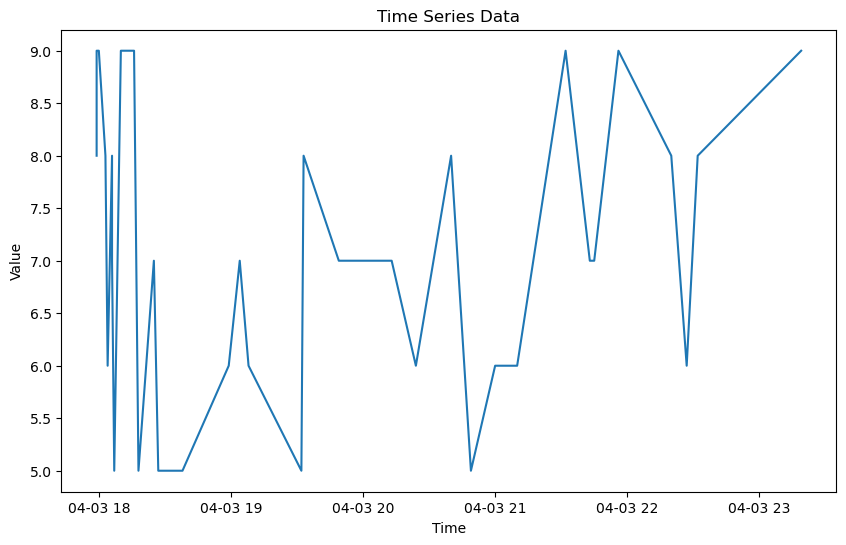

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:07 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 17:59:00  7.636858    6.066253    9.104654
1  2012-04-03 18:01:00  7.631896    6.086146    9.290056
2  2012-04-03 18:02:00  7.629415    6.075260    9.144692
3  2012-04-03 18:03:00  7.626934    5.994892    9.286999
4  2012-04-03 18:04:00  7.624453    5.936297    9.240748
5  2012-04-03 18:05:00  7.621972    6.162474    9.158029
6  2012-04-03 18:07:00  7.617009    6.079438    9.170125
7  2012-04-03 18:08:00  7.614528    6.165816    9.099426
8  2012-04-03 18:22:00  7.579793    6.090931    9.208532
9  2012-04-03 18:26:00  7.569869    6.018881    8.980058
10 2012-04-03 18:30:00  7.559944    6.081951    9.233197
11 2012-04-03 18:31:00  7.557463    5.952065    9.078911
12 2012-04-03 18:36:00  7.545058    5.943611    8.988725
13 2012-04-03 18:42:00  7.530171    5.955393    9.092040
14 2012-04-03 18:48:00  7.515284    5.986427    9.076744
15 2012-04-03 19:08:00  7.465662    5.855684    8.889316
16 2012-04-03 19:24:00  7.42596

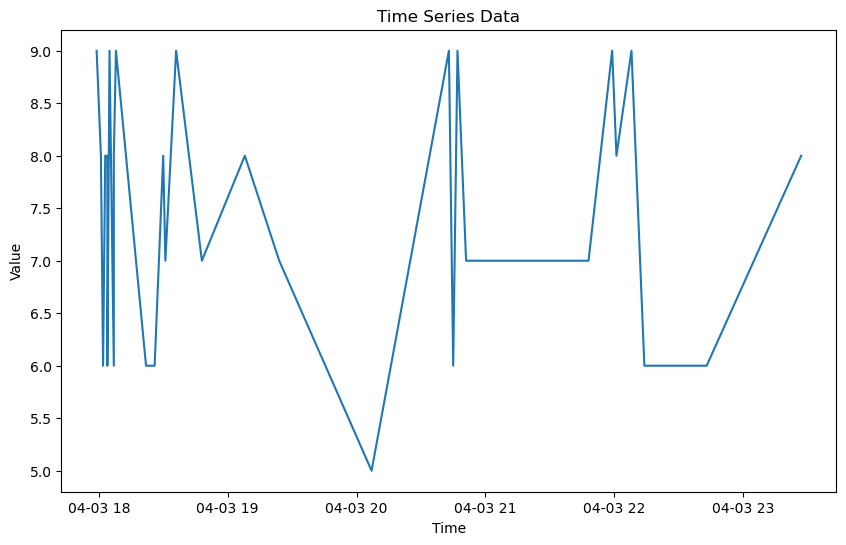

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:08 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:02:00  7.587687    5.525045    9.487849
1  2012-04-03 18:05:00  7.567795    5.665759    9.567156
2  2012-04-03 18:06:00  7.561164    5.547190    9.490341
3  2012-04-03 18:08:00  7.547902    5.569971    9.501516
4  2012-04-03 18:09:00  7.541271    5.485785    9.527274
5  2012-04-03 18:12:00  7.521379    5.390102    9.503703
6  2012-04-03 18:22:00  7.455070    5.550559    9.420327
7  2012-04-03 18:25:00  7.435178    5.527563    9.482304
8  2012-04-03 18:52:00  7.256145    5.344755    9.333237
9  2012-04-03 19:01:00  7.196467    5.235535    9.075649
10 2012-04-03 19:08:00  7.150052    5.110238    9.014604
11 2012-04-03 19:10:00  7.136790    5.230571    9.122597
12 2012-04-03 19:26:00  7.030696    5.017782    9.156138
13 2012-04-03 19:44:00  6.911341    4.879704    8.811737
14 2012-04-03 20:03:00  6.785355    4.875741    8.695869
15 2012-04-03 20:06:00  6.765463    4.766307    8.797095
16 2012-04-03 20:10:00  6.73893

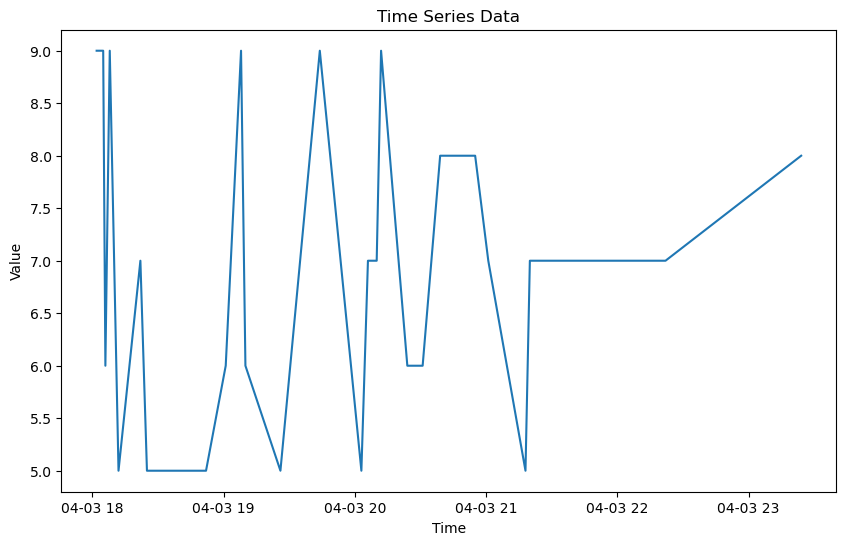

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:08 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:04:00  7.065388    5.405088    8.832302
1  2012-04-03 18:11:00  7.093689    5.497719    8.852128
2  2012-04-03 18:14:00  7.105818    5.481109    8.578748
3  2012-04-03 18:16:00  7.113904    5.370128    8.837556
4  2012-04-03 18:34:00  7.186676    5.651921    8.900704
5  2012-04-03 18:37:00  7.198805    5.473503    8.924243
6  2012-04-03 18:39:00  7.206891    5.528175    8.896400
7  2012-04-03 18:44:00  7.227106    5.508956    8.848148
8  2012-04-03 18:46:00  7.235192    5.486450    8.957921
9  2012-04-03 19:00:00  7.291793    5.576898    8.920720
10 2012-04-03 19:01:00  7.295836    5.556072    9.005341
11 2012-04-03 19:08:00  7.324136    5.577105    9.040176
12 2012-04-03 19:12:00  7.340308    5.630973    8.961749
13 2012-04-03 19:23:00  7.384781    5.656615    9.138013
14 2012-04-03 19:28:00  7.404995    5.597912    8.847339
15 2012-04-03 19:31:00  7.417124    5.742706    8.993159
16 2012-04-03 19:54:00  7.51011

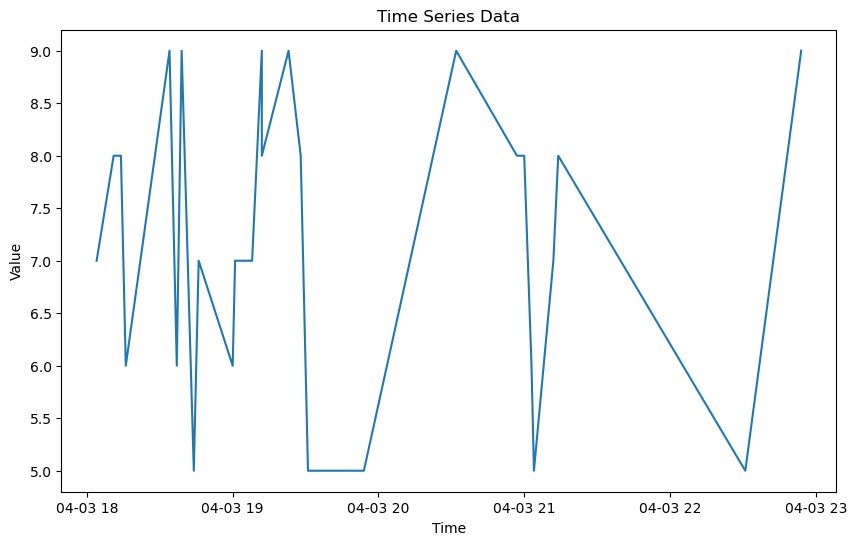

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:08 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:03:00  6.623392    4.945981    8.284426
1  2012-04-03 18:05:00  6.636484    4.794004    8.255817
2  2012-04-03 18:06:00  6.643030    4.953170    8.349829
3  2012-04-03 18:10:00  6.669214    4.927173    8.411033
4  2012-04-03 18:13:00  6.688852    4.953840    8.341099
5  2012-04-03 18:21:00  6.741219    5.137241    8.422350
6  2012-04-03 18:28:00  6.787041    5.074849    8.416536
7  2012-04-03 18:42:00  6.878684    5.077960    8.577604
8  2012-04-03 18:57:00  6.976873    5.195935    8.654604
9  2012-04-03 19:04:00  7.022695    5.379780    8.636896
10 2012-04-03 19:05:00  7.029241    5.299844    8.883802
11 2012-04-03 19:07:00  7.042333    5.265849    8.729658
12 2012-04-03 19:10:00  7.061971    5.350112    8.756511
13 2012-04-03 19:12:00  7.075062    5.467909    8.918583
14 2012-04-03 19:17:00  7.107793    5.485123    8.873724
15 2012-04-03 19:21:00  7.133977    5.402717    8.726970
16 2012-04-03 19:24:00  7.15361

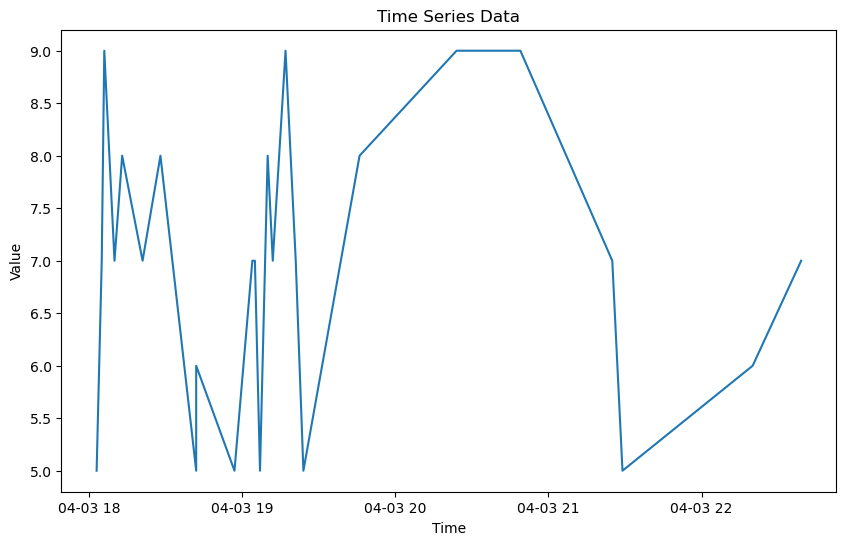

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:09 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:00:00  6.689816    5.091016    8.153834
1  2012-04-03 18:06:00  6.657228    5.147892    8.254855
2  2012-04-03 18:07:00  6.651796    5.146039    8.226424
3  2012-04-03 18:16:00  6.602915    5.096923    8.257671
4  2012-04-03 18:21:00  6.575758    5.021098    8.185270
5  2012-04-03 18:28:00  6.537739    4.766509    7.994659
6  2012-04-03 18:34:00  6.505151    4.942406    8.092663
7  2012-04-03 18:38:00  6.483426    5.061988    8.095762
8  2012-04-03 18:44:00  6.450839    4.926872    8.048083
9  2012-04-03 18:52:00  6.407388    4.890960    7.880315
10 2012-04-03 19:00:00  6.363938    4.843869    7.823716
11 2012-04-03 19:08:00  6.320487    4.813054    7.903707
12 2012-04-03 19:12:00  6.298762    4.836853    7.926386
13 2012-04-03 19:30:00  6.200999    4.557980    7.773789
14 2012-04-03 19:42:00  6.135823    4.565044    7.721508
15 2012-04-03 20:07:00  6.000041    4.364043    7.434934
16 2012-04-03 20:26:00  5.89684

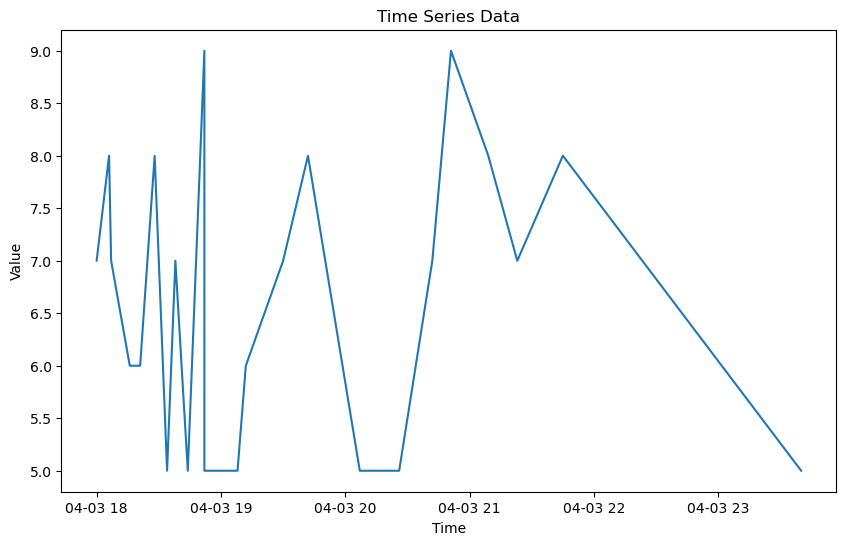

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:09 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:04:00  7.728982    6.117049    9.346758
1  2012-04-03 18:08:00  7.698728    6.067688    9.266342
2  2012-04-03 18:14:00  7.653348    6.108759    9.248153
3  2012-04-03 18:17:00  7.630658    5.879593    9.232681
4  2012-04-03 18:24:00  7.577715    5.853534    9.131934
5  2012-04-03 18:36:00  7.486955    5.830259    9.219135
6  2012-04-03 18:42:00  7.441575    5.794247    9.050510
7  2012-04-03 18:44:00  7.426448    5.755600    9.080130
8  2012-04-03 18:48:00  7.396195    5.857184    9.000978
9  2012-04-03 18:50:00  7.381068    5.690324    9.162928
10 2012-04-03 18:52:00  7.365942    5.680798    9.104780
11 2012-04-03 18:58:00  7.320562    5.551803    8.925947
12 2012-04-03 19:09:00  7.237365    5.524419    8.960271
13 2012-04-03 19:25:00  7.116352    5.447962    8.670196
14 2012-04-03 19:37:00  7.025592    5.414561    8.744250
15 2012-04-03 19:40:00  7.002902    5.335480    8.510702
16 2012-04-03 19:50:00  6.92726

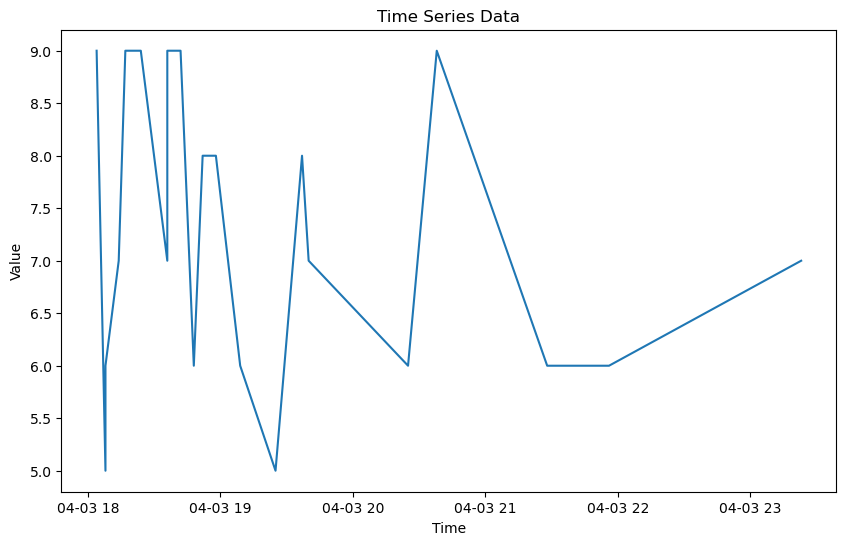

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:09 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:03:00  5.403704    4.084066    6.901940
1  2012-04-03 18:15:00  5.530297    4.098319    6.832349
2  2012-04-03 18:26:00  5.646342    4.283431    7.184428
3  2012-04-03 18:40:00  5.794035    4.393913    7.271727
4  2012-04-03 18:50:00  5.899529    4.471535    7.290178
5  2012-04-03 18:52:00  5.920628    4.566636    7.300279
6  2012-04-03 19:01:00  6.015574    4.710786    7.471933
7  2012-04-03 19:23:00  6.247662    4.850997    7.675528
8  2012-04-03 19:50:00  6.532498    5.148568    7.944878
9  2012-04-03 19:54:00  6.574696    5.074797    8.084287
10 2012-04-03 20:06:00  6.701290    5.252519    8.114304
11 2012-04-03 20:19:00  6.838433    5.409215    8.237249
12 2012-04-03 20:24:00  6.891181    5.328555    8.407733
13 2012-04-03 20:32:00  6.975577    5.529167    8.487408
14 2012-04-03 20:37:00  7.028324    5.636742    8.532689
15 2012-04-03 20:40:00  7.059973    5.669052    8.461737
16 2012-04-03 21:02:00  7.29206

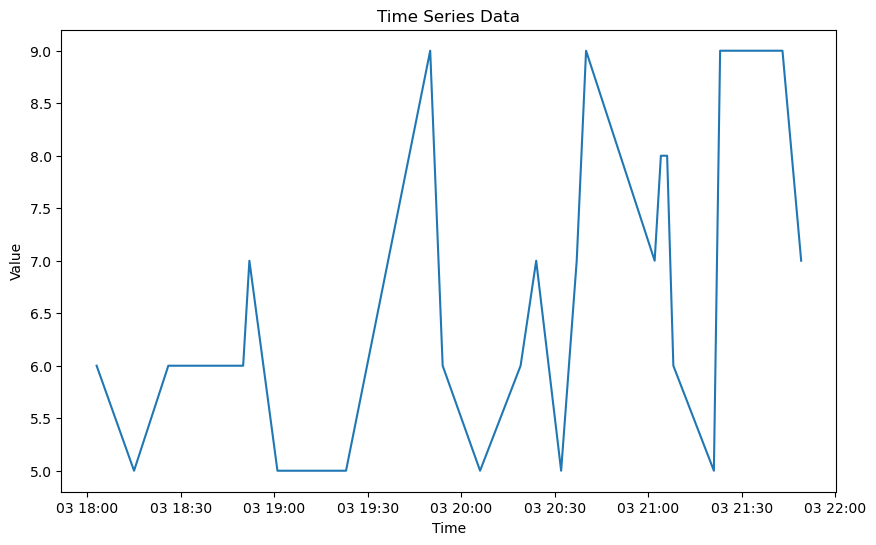

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:09 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 17:59:00  6.706645    5.420383    8.035883
1  2012-04-03 18:00:00  6.709810    5.426976    8.092462
2  2012-04-03 18:01:00  6.712975    5.282918    8.000439
3  2012-04-03 18:16:00  6.760449    5.431338    8.122470
4  2012-04-03 18:45:00  6.852230    5.515338    8.244053
5  2012-04-03 18:46:00  6.855395    5.424754    8.257720
6  2012-04-03 18:54:00  6.880714    5.457382    8.249447
7  2012-04-03 19:01:00  6.902869    5.550066    8.365157
8  2012-04-03 19:16:00  6.950342    5.613497    8.292736
9  2012-04-03 19:26:00  6.981991    5.652313    8.359822
10 2012-04-03 19:27:00  6.985156    5.560615    8.246771
11 2012-04-03 19:29:00  6.991485    5.631877    8.304423
12 2012-04-03 19:54:00  7.070608    5.703442    8.360357
13 2012-04-03 20:03:00  7.099092    5.729774    8.519635
14 2012-04-03 20:11:00  7.124411    5.815444    8.526983
15 2012-04-03 20:21:00  7.156060    5.918514    8.592423
16 2012-04-03 20:31:00  7.18770

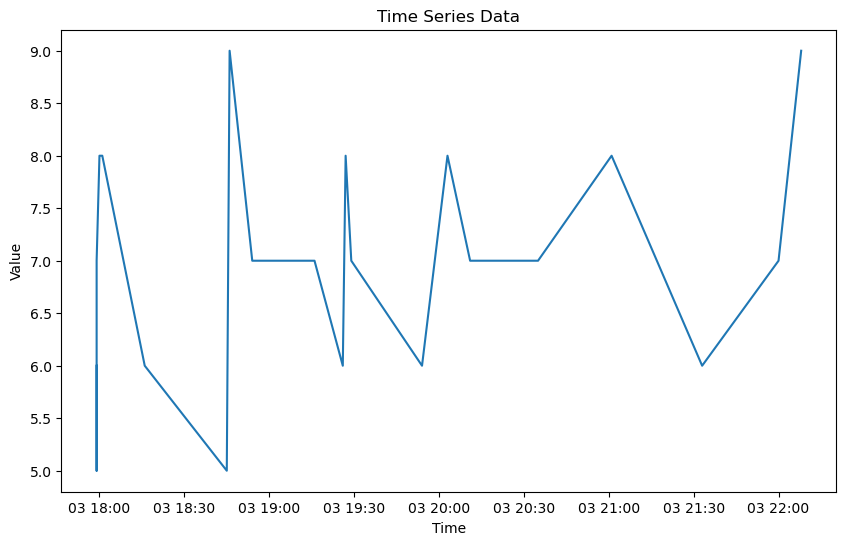

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:10 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:02:00  6.272953    4.680670    7.831039
1  2012-04-03 18:08:00  6.330419    4.733213    7.920317
2  2012-04-03 18:13:00  6.378307    4.795696    7.861735
3  2012-04-03 18:20:00  6.445350    4.898729    7.969010
4  2012-04-03 18:22:00  6.464506    4.866200    7.984594
5  2012-04-03 18:25:00  6.493239    4.894332    8.022474
6  2012-04-03 18:33:00  6.569860    4.942001    8.161302
7  2012-04-03 18:39:00  6.627325    5.032925    8.186897
8  2012-04-03 18:56:00  6.790145    5.192787    8.298413
9  2012-04-03 19:28:00  7.096630    5.556087    8.652364
10 2012-04-03 19:34:00  7.154096    5.664531    8.767483
11 2012-04-03 20:04:00  7.441425    5.762196    8.948838
12 2012-04-03 20:07:00  7.470158    5.873329    9.096420
13 2012-04-03 20:23:00  7.623400    6.109472    9.169943
14 2012-04-03 20:49:00  7.872419    6.341414    9.324058
15 2012-04-03 21:16:00  8.131015    6.561411    9.585556
16 2012-04-03 21:26:00  8.22679

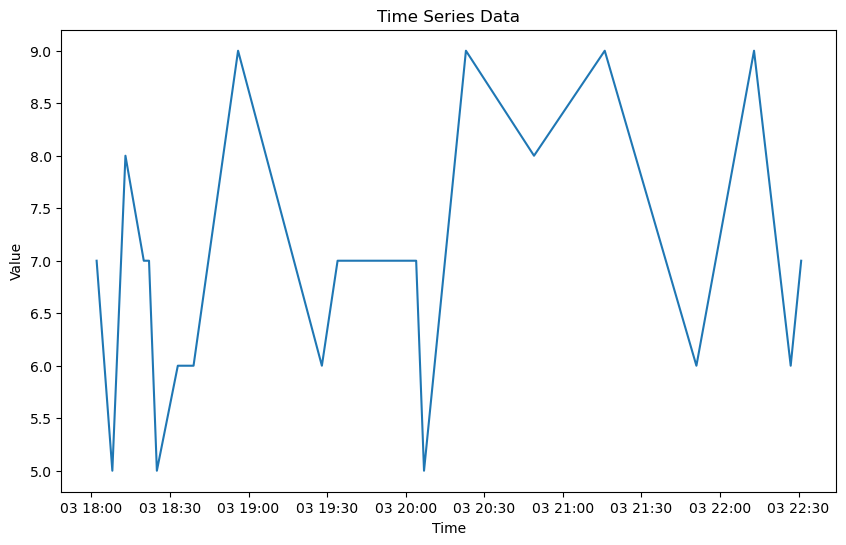

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:10 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 17:59:00  6.931815    4.959758    8.788701
1  2012-04-03 18:06:00  6.936231    5.230450    8.976318
2  2012-04-03 18:35:00  6.954525    5.066014    8.929102
3  2012-04-03 18:38:00  6.956417    5.180170    9.075888
4  2012-04-03 19:06:00  6.974080    5.022991    8.828078
5  2012-04-03 19:15:00  6.979758    5.117135    9.057731
6  2012-04-03 19:19:00  6.982281    5.157864    8.846444
7  2012-04-03 19:35:00  6.992374    5.183112    8.906589
8  2012-04-03 19:45:00  6.998683    5.094004    8.918698
9  2012-04-03 19:47:00  6.999944    5.095660    8.961433
10 2012-04-03 21:14:00  7.054826    5.294852    8.908161
11 2012-04-03 21:16:00  7.056088    5.152241    8.932596
12 2012-04-03 21:18:00  7.057350    5.204181    8.930302
13 2012-04-03 21:25:00  7.061765    5.192696    9.031727
14 2012-04-03 22:07:00  7.088260    5.284112    8.911649
15 2012-04-03 22:17:00  7.094568    5.168165    8.959262
16 2012-04-03 22:27:00  7.10087

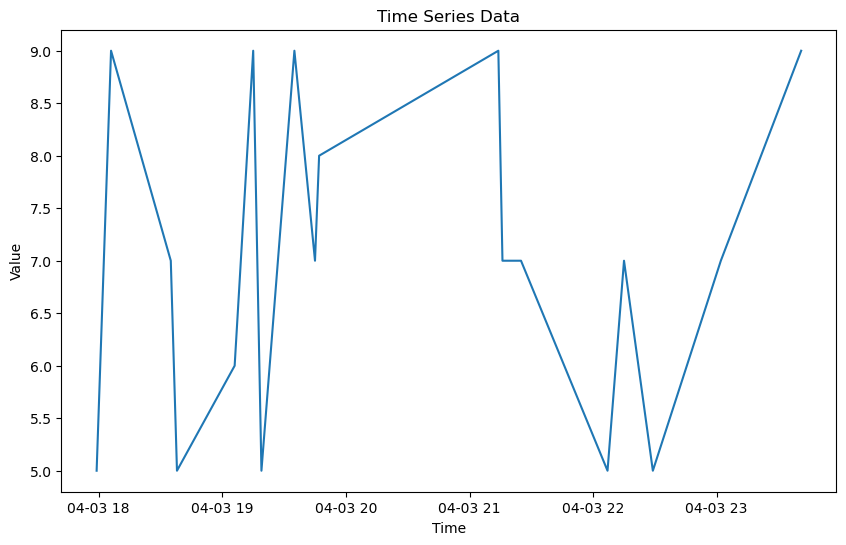

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:10 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 17:59:00  8.148035    6.625227    9.657844
1  2012-04-03 18:12:00  8.041224    6.410506    9.581984
2  2012-04-03 18:17:00  8.000143    6.333660    9.557069
3  2012-04-03 18:34:00  7.860467    6.363413    9.492888
4  2012-04-03 18:40:00  7.811170    6.231725    9.451185
5  2012-04-03 19:09:00  7.572900    5.911709    9.185410
6  2012-04-03 20:22:00  6.973117    5.236386    8.482954
7  2012-04-03 20:57:00  6.685550    5.149747    8.290203
8  2012-04-03 21:01:00  6.652686    5.014149    8.151115
9  2012-04-03 21:06:00  6.611605    5.060109    8.240770
10 2012-04-03 21:43:00  6.307605    4.593706    7.836180
11 2012-04-03 21:45:00  6.291173    4.699739    7.885971
12 2012-04-03 21:55:00  6.209011    4.494202    7.895500
13 2012-04-03 22:05:00  6.126849    4.456518    7.582517
14 2012-04-03 22:15:00  6.044687    4.450980    7.585667
15 2012-04-03 22:25:00  5.962524    4.506003    7.654386
16 2012-04-03 22:35:00  5.88036

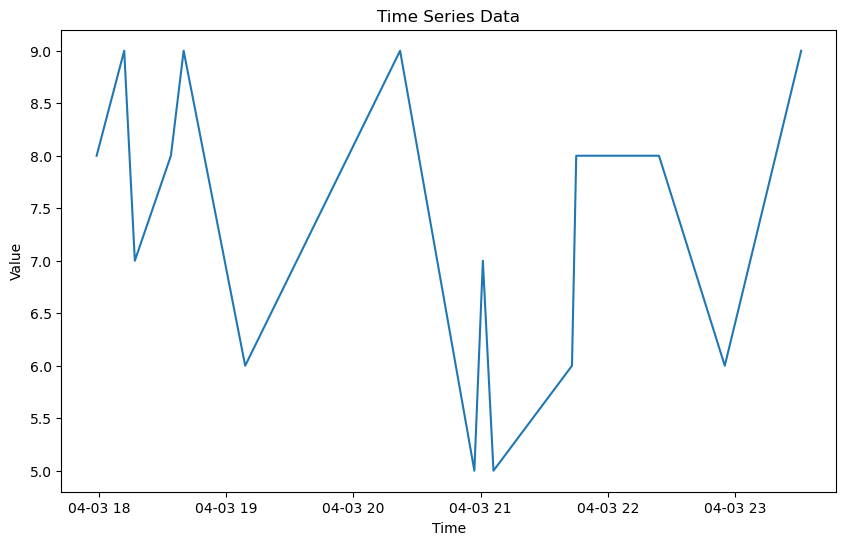

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:11 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 17:59:00  8.314385    6.748283    9.772072
1  2012-04-03 18:14:00  8.235508    6.777776    9.701272
2  2012-04-03 18:50:00  8.046203    6.512440    9.498433
3  2012-04-03 19:37:00  7.799055    6.316281    9.202934
4  2012-04-03 20:37:00  7.483546    6.041256    8.891662
5  2012-04-03 20:41:00  7.462513    5.994973    9.010300
6  2012-04-03 20:42:00  7.457254    5.870513    8.894049
7  2012-04-03 21:18:00  7.267949    5.858921    8.837315
8  2012-04-03 21:52:00  7.089161    5.606548    8.479476
9  2012-04-03 22:02:00  7.036576    5.466829    8.617500
10 2012-04-03 22:12:00  6.983992    5.420081    8.475170
11 2012-04-03 22:22:00  6.931407    5.380179    8.292385
12 2012-04-03 22:32:00  6.878822    5.322700    8.456333
13 2012-04-03 22:42:00  6.826237    5.355567    8.271921
14 2012-04-03 22:52:00  6.773653    5.219551    8.259038
15 2012-04-03 23:02:00  6.721068    5.231032    8.129440
16 2012-04-03 23:12:00  6.66848

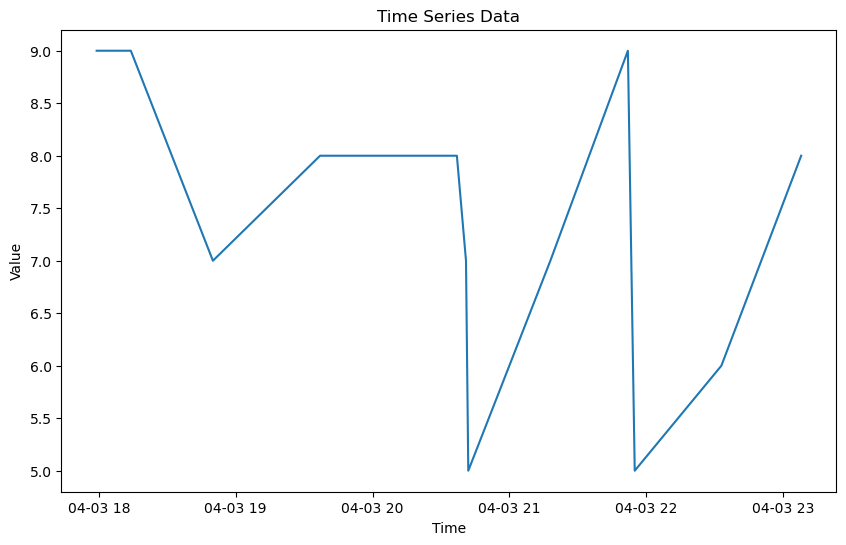

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:11 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:02:00  7.310293    5.960163    8.666243
1  2012-04-03 18:09:00  7.152802    5.694527    8.594155
2  2012-04-03 18:17:00  6.972813    5.550016    8.460483
3  2012-04-03 18:22:00  6.860319    5.482013    8.130833
4  2012-04-03 18:32:00  6.635333    5.277953    8.075379
5  2012-04-03 19:15:00  5.667890    4.254625    7.126556
6  2012-04-03 19:28:00  5.375408    4.044919    6.839625
7  2012-04-03 19:57:00  4.722947    3.410257    6.166332
8  2012-04-03 20:07:00  4.497960    3.026288    5.855434
9  2012-04-03 20:17:00  4.272973    2.894293    5.687194
10 2012-04-03 20:27:00  4.047987    2.668149    5.424399
11 2012-04-03 20:37:00  3.823000    2.503428    5.125073
12 2012-04-03 20:47:00  3.598013    2.186634    5.092677
13 2012-04-03 20:57:00  3.373027    1.922471    4.703861
14 2012-04-03 21:07:00  3.148040    1.640072    4.577114
15 2012-04-03 21:17:00  2.923054    1.479459    4.276350
16 2012-04-03 21:27:00  2.69806

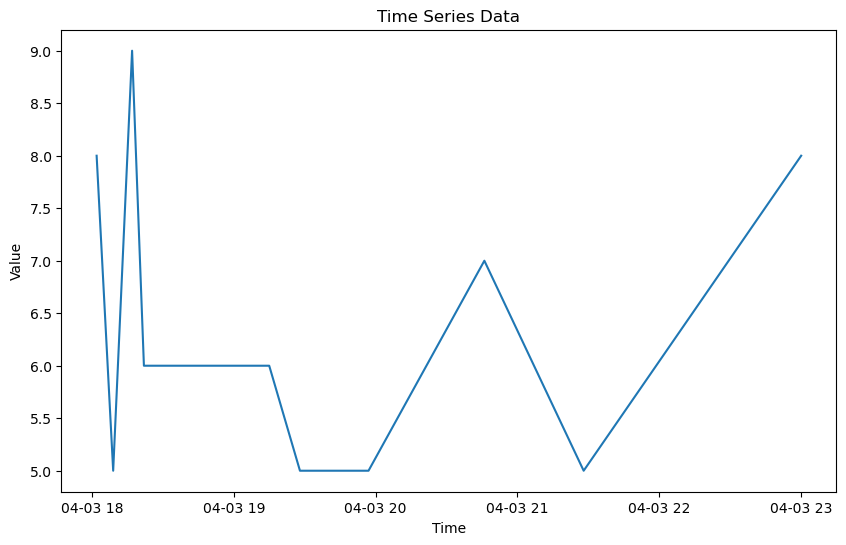

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:12 - cmdstanpy - INFO - Chain [1] start proc

                    ds       yhat  yhat_lower  yhat_upper
0  2012-04-03 18:04:00   6.373927    4.824473    7.816582
1  2012-04-03 18:07:00   6.465984    5.159371    8.049228
2  2012-04-03 18:08:00   6.496669    4.976594    8.045202
3  2012-04-03 18:48:00   7.724090    6.160276    9.179984
4  2012-04-03 18:49:00   7.754776    6.363005    9.230239
5  2012-04-03 18:52:00   7.846832    6.339529    9.349190
6  2012-04-03 18:54:00   7.908203    6.448779    9.510753
7  2012-04-03 19:11:00   8.429857    6.909467    9.935361
8  2012-04-03 19:21:00   8.736713    7.227503   10.206802
9  2012-04-03 19:31:00   9.043568    7.446457   10.559666
10 2012-04-03 19:41:00   9.350423    7.866424   10.806801
11 2012-04-03 19:51:00   9.657278    8.163778   11.172206
12 2012-04-03 20:01:00   9.964133    8.413854   11.432554
13 2012-04-03 20:11:00  10.270989    8.668496   11.824956
14 2012-04-03 20:21:00  10.577844    9.020165   12.160770
15 2012-04-03 20:31:00  10.884699    9.431230   12.415948
16 2012-04-03 

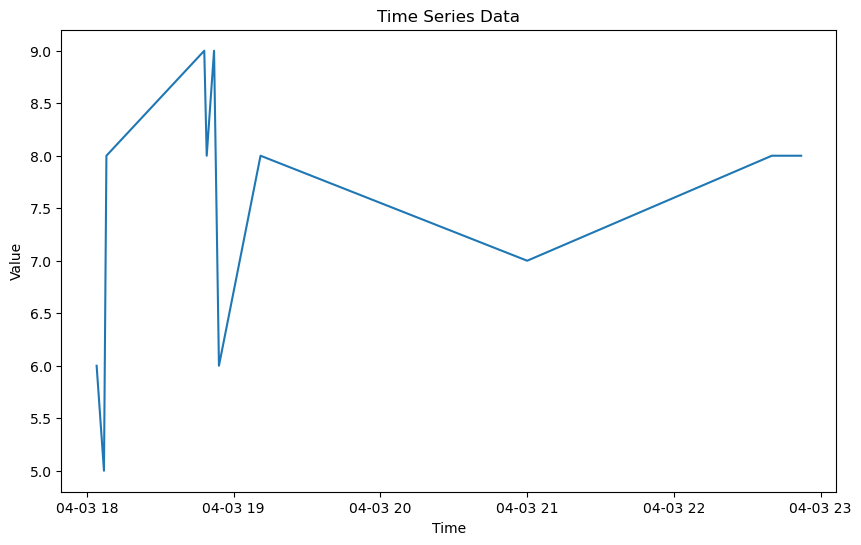

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:12 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:09:00  7.473035    5.685451    9.481971
1  2012-04-03 18:19:00  7.392991    5.506934    9.384656
2  2012-04-03 18:23:00  7.360973    5.293227    9.388598
3  2012-04-03 18:26:00  7.336959    5.347685    9.345785
4  2012-04-03 18:38:00  7.240905    5.199107    9.285802
5  2012-04-03 18:45:00  7.184874    5.237475    9.134105
6  2012-04-03 18:55:00  7.104829    5.109517    9.121593
7  2012-04-03 19:19:00  6.912722    5.026814    8.898559
8  2012-04-03 19:29:00  6.832677    4.840876    8.839373
9  2012-04-03 19:39:00  6.752632    4.799485    8.585315
10 2012-04-03 19:49:00  6.672587    4.710808    8.776909
11 2012-04-03 19:59:00  6.592542    4.660139    8.502357
12 2012-04-03 20:09:00  6.512497    4.450905    8.397082
13 2012-04-03 20:19:00  6.432453    4.548674    8.500006
14 2012-04-03 20:29:00  6.352408    4.370200    8.209442
15 2012-04-03 20:39:00  6.272363    4.360357    8.147602
16 2012-04-03 20:49:00  6.19231

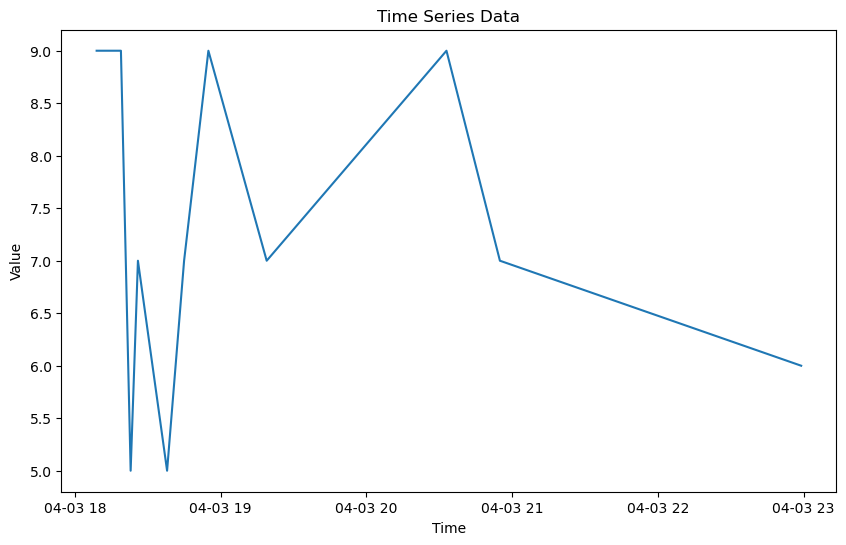

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:12 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:02:00  8.678095    7.833803    9.502300
1  2012-04-03 18:12:00  8.540876    7.728563    9.395413
2  2012-04-03 19:13:00  7.703842    6.834568    8.465084
3  2012-04-03 19:23:00  7.566623    6.712790    8.369442
4  2012-04-03 19:38:00  7.360795    6.553449    8.208456
5  2012-04-03 20:15:00  6.853085    6.022499    7.649682
6  2012-04-03 20:47:00  6.413985    5.593145    7.193037
7  2012-04-03 21:26:00  5.878832    5.029459    6.664995
8  2012-04-03 21:36:00  5.741613    4.932791    6.590138
9  2012-04-03 21:46:00  5.604395    4.884359    6.408655
10 2012-04-03 21:56:00  5.467176    4.649092    6.272759
11 2012-04-03 22:06:00  5.329957    4.472485    6.106460
12 2012-04-03 22:16:00  5.192738    4.441531    6.041864
13 2012-04-03 22:26:00  5.055520    4.197167    5.867493
14 2012-04-03 22:36:00  4.918301    4.135550    5.743371
15 2012-04-03 22:46:00  4.781082    3.979130    5.599649
16 2012-04-03 22:56:00  4.64386

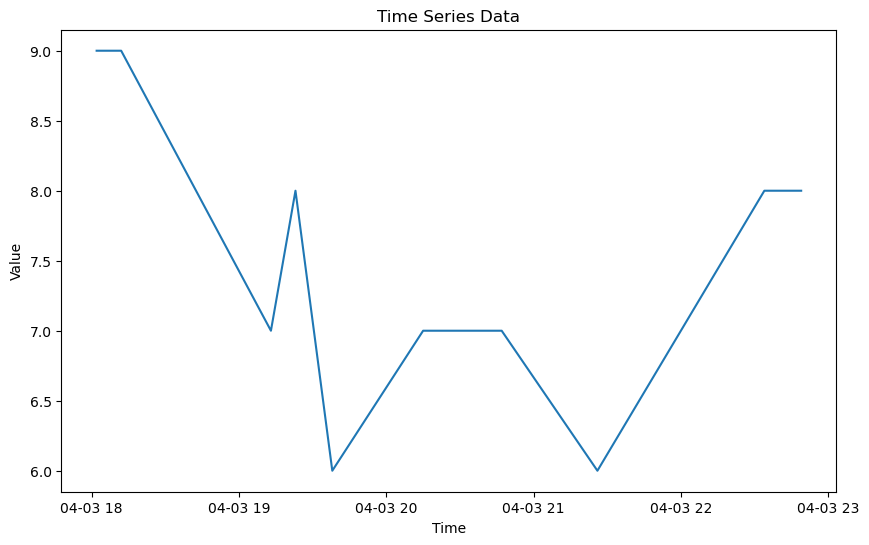

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:13 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 17:59:00  8.576536    7.420362    9.743866
1  2012-04-03 18:08:00  8.235738    6.999633    9.426650
2  2012-04-03 18:19:00  7.819206    6.580048    8.992240
3  2012-04-03 18:30:00  7.402675    6.206287    8.529799
4  2012-04-03 18:37:00  7.137609    5.884412    8.322604
5  2012-04-03 18:42:00  6.948276    5.703289    8.177896
6  2012-04-03 18:56:00  6.418145    5.202823    7.649168
7  2012-04-03 19:48:00  4.449087    3.165153    5.678602
8  2012-04-03 19:58:00  4.070422    2.825709    5.289984
9  2012-04-03 20:08:00  3.691757    2.417669    4.985941
10 2012-04-03 20:18:00  3.313092    2.169857    4.506174
11 2012-04-03 20:28:00  2.934427    1.790414    4.128747
12 2012-04-03 20:38:00  2.555762    1.339478    3.711162
13 2012-04-03 20:48:00  2.177097    0.990503    3.527996
14 2012-04-03 20:58:00  1.798432    0.582316    2.978661
15 2012-04-03 21:08:00  1.419767    0.218284    2.584670
16 2012-04-03 21:18:00  1.04110

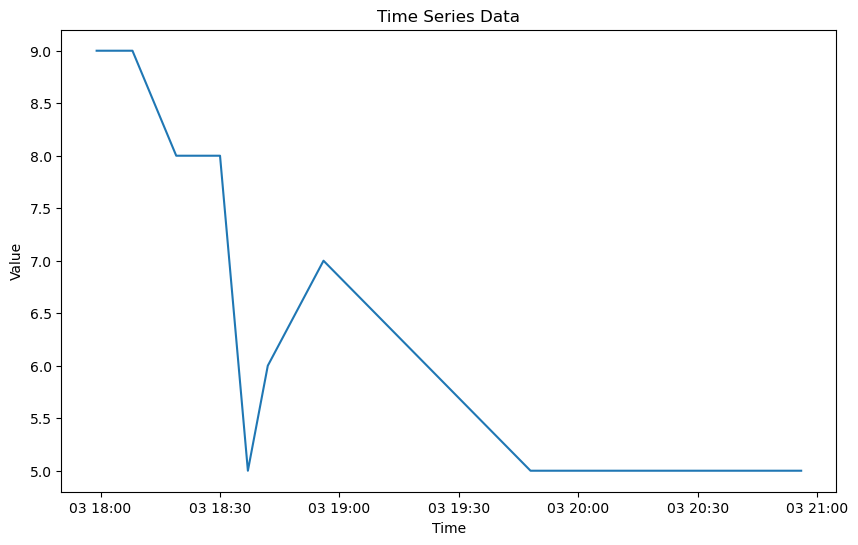

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:13 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:10:00  6.630661    5.052843    8.162679
1  2012-04-03 18:38:00  6.507452    4.912322    8.029839
2  2012-04-03 19:18:00  6.331440    4.827014    7.754065
3  2012-04-03 19:46:00  6.208232    4.723370    7.711582
4  2012-04-03 20:14:00  6.085023    4.605268    7.590952
5  2012-04-03 21:00:00  5.882609    4.391315    7.307503
6  2012-04-03 21:11:00  5.834206    4.252158    7.335033
7  2012-04-03 21:21:00  5.790203    4.271621    7.239054
8  2012-04-03 21:31:00  5.746200    4.255109    7.186255
9  2012-04-03 21:41:00  5.702197    4.219777    7.176984
10 2012-04-03 21:51:00  5.658194    4.086572    7.127617
11 2012-04-03 22:01:00  5.614191    4.065180    7.160875
12 2012-04-03 22:11:00  5.570188    4.331366    7.138081
13 2012-04-03 22:21:00  5.526185    4.108481    7.011368
14 2012-04-03 22:31:00  5.482182    4.054044    6.894420
15 2012-04-03 22:41:00  5.438179    4.043637    6.900923
16 2012-04-03 22:51:00  5.39417

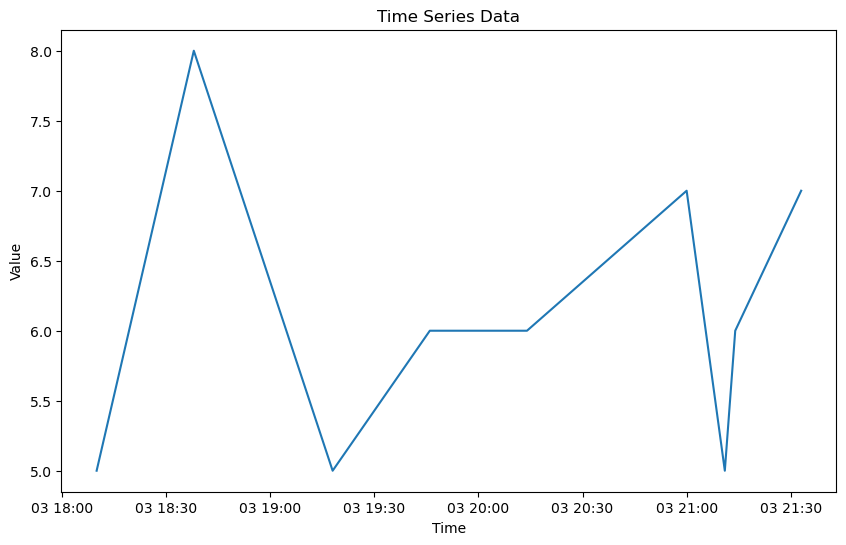

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:14 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:01:00  6.883530    5.264089    8.306526
1  2012-04-03 18:16:00  6.909044    5.309429    8.379196
2  2012-04-03 18:24:00  6.922652    5.502227    8.416168
3  2012-04-03 19:14:00  7.007699    5.603161    8.536486
4  2012-04-03 19:16:00  7.011101    5.431694    8.530920
5  2012-04-03 20:15:00  7.111456    5.608650    8.631892
6  2012-04-03 20:38:00  7.150578    5.671607    8.666812
7  2012-04-03 20:48:00  7.167587    5.638022    8.685687
8  2012-04-03 20:58:00  7.184597    5.650899    8.675766
9  2012-04-03 21:08:00  7.201606    5.585441    8.618294
10 2012-04-03 21:18:00  7.218616    5.616885    8.730169
11 2012-04-03 21:28:00  7.235625    5.714691    8.746146
12 2012-04-03 21:38:00  7.252634    5.636067    8.740932
13 2012-04-03 21:48:00  7.269644    5.727141    8.872589
14 2012-04-03 21:58:00  7.286653    5.777254    8.897410
15 2012-04-03 22:08:00  7.303663    5.698713    8.896157
16 2012-04-03 22:18:00  7.32067

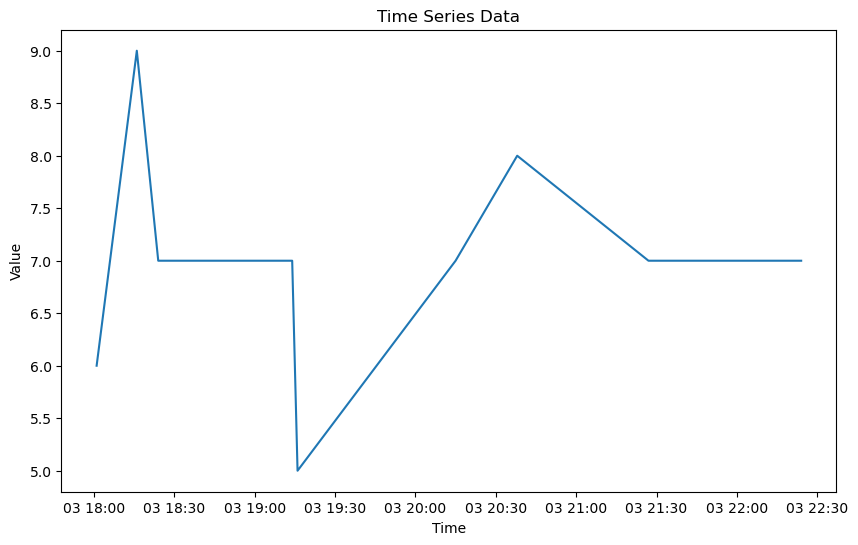

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:14 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:08:00  5.941115    4.706007    7.051030
1  2012-04-03 18:16:00  5.945509    4.812223    7.050370
2  2012-04-03 18:59:00  5.969126    4.736578    7.228165
3  2012-04-03 20:12:00  6.009221    4.849915    7.178418
4  2012-04-03 20:17:00  6.011967    4.829921    7.235573
5  2012-04-03 20:39:00  6.024050    4.827546    7.176038
6  2012-04-03 21:22:00  6.047668    4.853881    7.347652
7  2012-04-03 21:32:00  6.053160    4.925728    7.236279
8  2012-04-03 21:42:00  6.058653    4.903171    7.257813
9  2012-04-03 21:52:00  6.064145    4.806775    7.157206
10 2012-04-03 22:02:00  6.069637    4.990463    7.261045
11 2012-04-03 22:12:00  6.075130    4.917506    7.283311
12 2012-04-03 22:22:00  6.080622    4.896043    7.378809
13 2012-04-03 22:32:00  6.086115    4.872002    7.267910
14 2012-04-03 22:42:00  6.091607    4.912023    7.244829
15 2012-04-03 22:52:00  6.097100    4.874522    7.247671
16 2012-04-03 23:02:00  6.10259

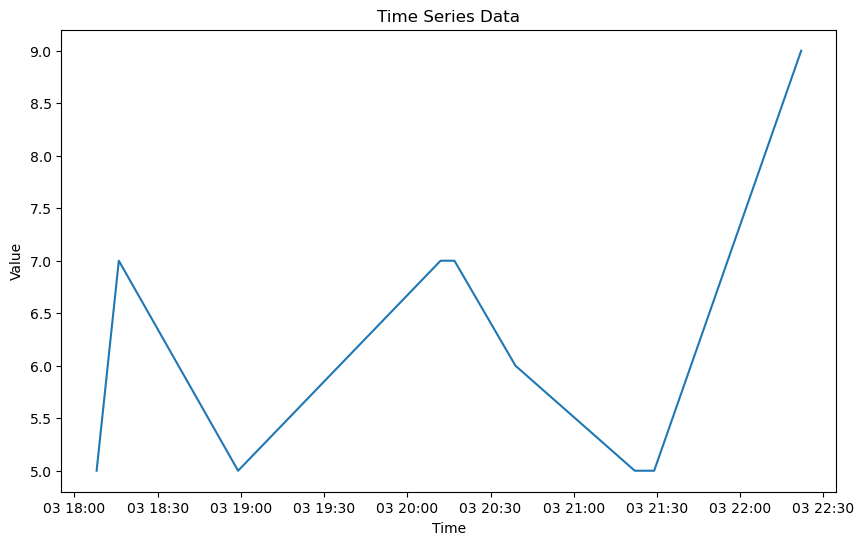

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:14 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:19:00  6.261708    4.608974    7.950461
1  2012-04-03 18:48:00  6.540598    5.052532    8.004671
2  2012-04-03 18:53:00  6.588682    5.044753    8.064888
3  2012-04-03 18:54:00  6.598299    5.092929    8.166430
4  2012-04-03 20:18:00  7.406117    5.797458    8.812860
5  2012-04-03 20:28:00  7.502286    5.872680    8.949066
6  2012-04-03 20:38:00  7.598455    6.016078    9.181978
7  2012-04-03 20:48:00  7.694624    6.113045    9.222713
8  2012-04-03 20:58:00  7.790793    6.398437    9.331262
9  2012-04-03 21:08:00  7.886962    6.288795    9.399304
10 2012-04-03 21:18:00  7.983130    6.579546    9.536127
11 2012-04-03 21:28:00  8.079299    6.557487    9.613354
12 2012-04-03 21:38:00  8.175468    6.600035    9.725097
13 2012-04-03 21:48:00  8.271637    6.678833    9.723153
14 2012-04-03 21:58:00  8.367806    6.826551    9.830639


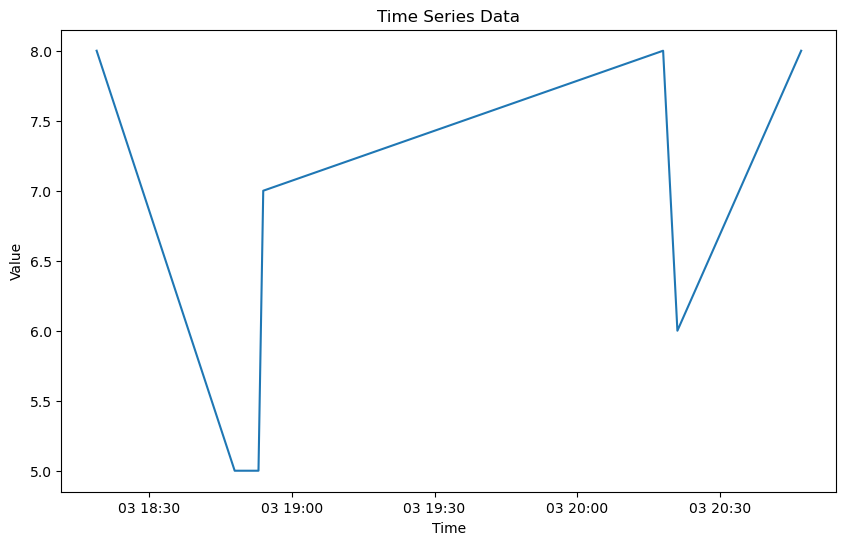

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:15 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:10:00  5.544761    3.761898    7.412474
1  2012-04-03 18:55:00  6.472392    4.669895    8.265294
2  2012-04-03 19:19:00  6.967129    5.248907    8.842743
3  2012-04-03 19:27:00  7.132041    5.343336    8.924318
4  2012-04-03 19:41:00  7.420637    5.624984    9.250882
5  2012-04-03 19:51:00  7.626777    5.894598    9.458164
6  2012-04-03 20:01:00  7.832918    6.030131    9.668272
7  2012-04-03 20:11:00  8.039058    6.249720    9.948798
8  2012-04-03 20:21:00  8.245198    6.423448   10.168628
9  2012-04-03 20:31:00  8.451338    6.663623   10.235495
10 2012-04-03 20:41:00  8.657479    6.772892   10.508414
11 2012-04-03 20:51:00  8.863619    7.023925   10.751401
12 2012-04-03 21:01:00  9.069759    7.290970   10.836280
13 2012-04-03 21:11:00  9.275899    7.346960   10.915814
14 2012-04-03 21:21:00  9.482039    7.630452   11.347151


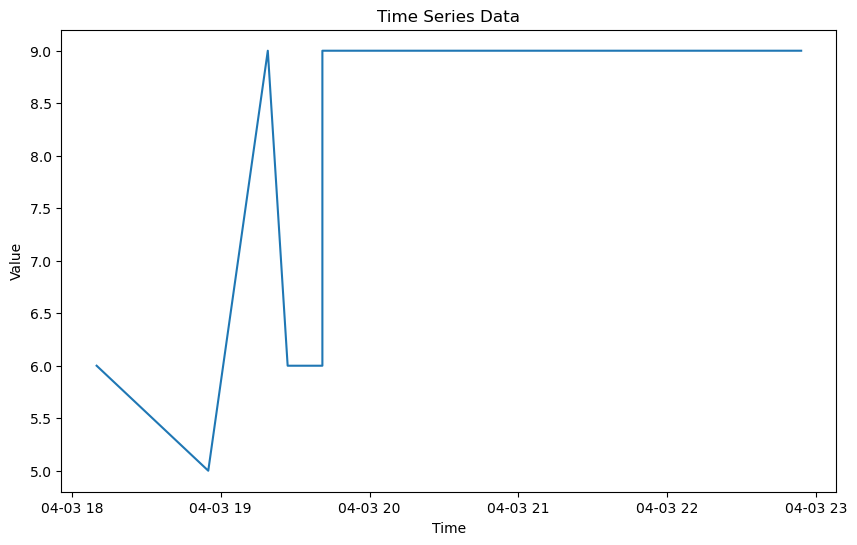

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:15 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:21:00  6.506547    5.775787    7.204923
1  2012-04-03 18:52:00  7.051239    6.353835    7.783723
2  2012-04-03 19:25:00  7.631072    6.926045    8.364239
3  2012-04-03 19:29:00  7.701355    6.980043    8.377332
4  2012-04-03 19:52:00  8.105481    7.360881    8.845695
5  2012-04-03 20:02:00  8.281189    7.612474    9.002373
6  2012-04-03 20:12:00  8.456896    7.714199    9.171870
7  2012-04-03 20:22:00  8.632603    7.934803    9.325728
8  2012-04-03 20:32:00  8.808310    8.059680    9.574910
9  2012-04-03 20:42:00  8.984017    8.247400    9.701888
10 2012-04-03 20:52:00  9.159724    8.440527    9.868437
11 2012-04-03 21:02:00  9.335431    8.646662   10.008136
12 2012-04-03 21:12:00  9.511138    8.827283   10.211870
13 2012-04-03 21:22:00  9.686846    8.972663   10.414308
14 2012-04-03 21:32:00  9.862553    9.108535   10.564554


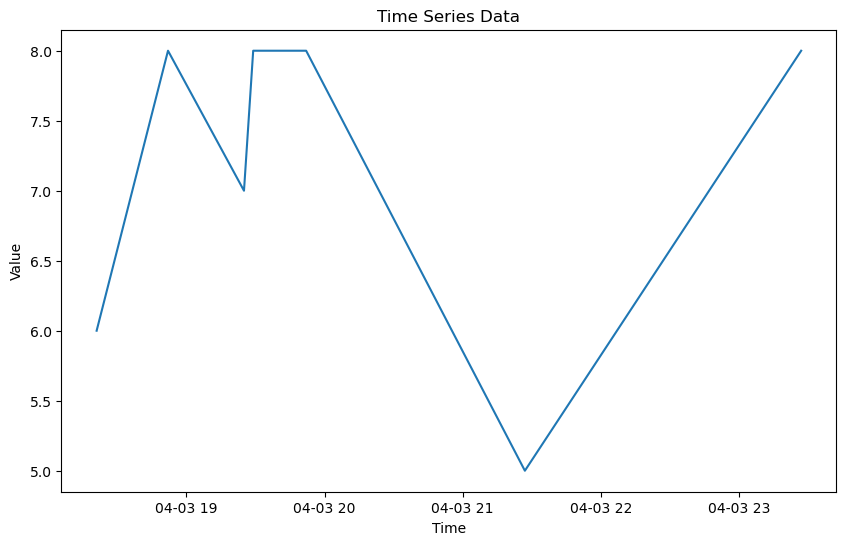

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:16 - cmdstanpy - INFO - Chain [1] start proc

                    ds       yhat  yhat_lower  yhat_upper
0  2012-04-03 18:07:00   5.499203    4.606329    6.393081
1  2012-04-03 18:08:00   5.530959    4.630555    6.456078
2  2012-04-03 18:59:00   7.150518    6.223503    8.109554
3  2012-04-03 19:36:00   8.325492    7.424202    9.153296
4  2012-04-03 19:46:00   8.643052    7.763341    9.525554
5  2012-04-03 19:56:00   8.960613    8.085084    9.895705
6  2012-04-03 20:06:00   9.278173    8.366675   10.158703
7  2012-04-03 20:16:00   9.595734    8.746763   10.514036
8  2012-04-03 20:26:00   9.913294    9.010920   10.776978
9  2012-04-03 20:36:00  10.230855    9.315199   11.149843
10 2012-04-03 20:46:00  10.548415    9.574431   11.478109
11 2012-04-03 20:56:00  10.865976    9.911534   11.806712
12 2012-04-03 21:06:00  11.183537   10.189188   12.035098
13 2012-04-03 21:16:00  11.501097   10.601773   12.392847


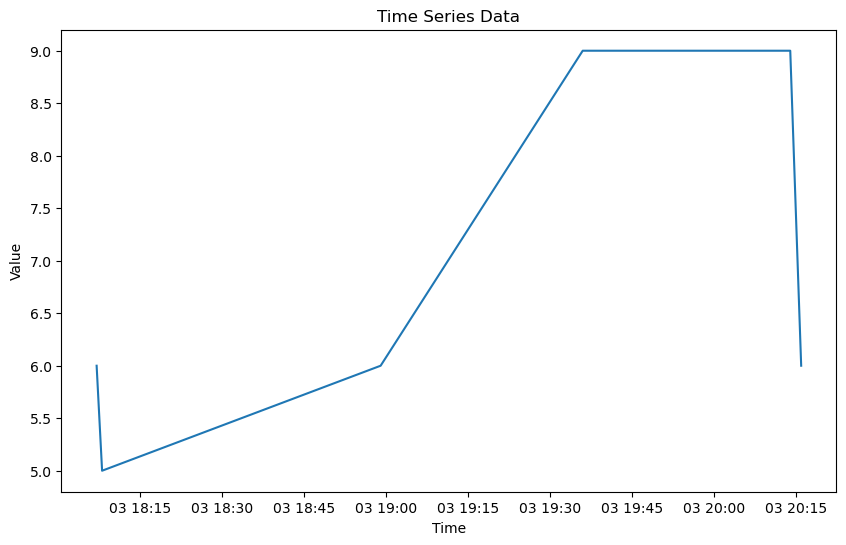

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:16 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:07:00  9.203595    8.577822    9.841356
1  2012-04-03 18:30:00  8.565393    7.934317    9.217437
2  2012-04-03 19:27:00  6.983761    6.305825    7.618114
3  2012-04-03 19:32:00  6.845022    6.168142    7.513154
4  2012-04-03 19:48:00  6.401055    5.816246    7.096768
5  2012-04-03 19:58:00  6.123576    5.503061    6.745512
6  2012-04-03 20:08:00  5.846097    5.177368    6.473147
7  2012-04-03 20:18:00  5.568617    4.894984    6.231763
8  2012-04-03 20:28:00  5.291138    4.607983    5.923771
9  2012-04-03 20:38:00  5.013659    4.345544    5.698602
10 2012-04-03 20:48:00  4.736180    4.084840    5.382908
11 2012-04-03 20:58:00  4.458700    3.834399    5.198471
12 2012-04-03 21:08:00  4.181221    3.555471    4.798828
13 2012-04-03 21:18:00  3.903742    3.251138    4.555867
14 2012-04-03 21:28:00  3.626263    2.969352    4.205129


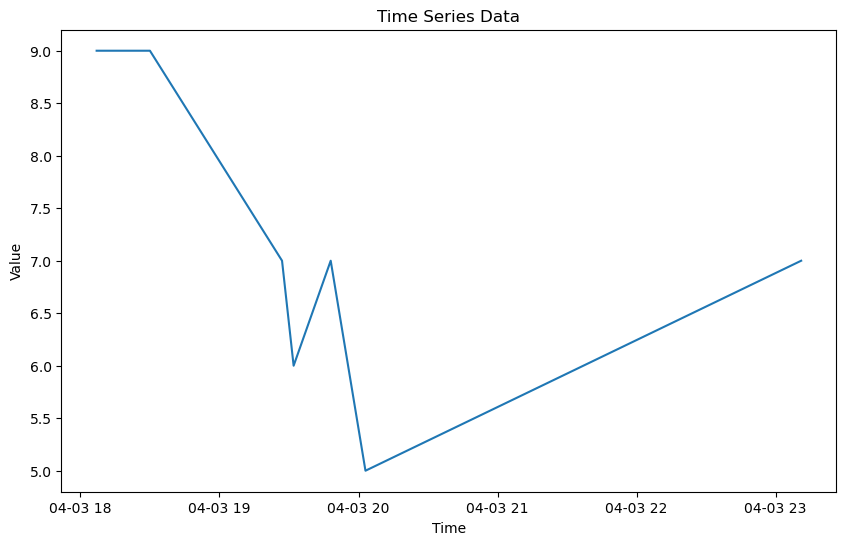

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:16 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:20:00  7.879390    7.040518    8.790689
1  2012-04-03 18:41:00  8.101933    7.165367    8.973545
2  2012-04-03 19:07:00  8.377463    7.498896    9.254323
3  2012-04-03 19:38:00  8.705978    7.860381    9.659652
4  2012-04-03 19:59:00  8.928521    8.038441    9.842948
5  2012-04-03 20:09:00  9.034494    8.100066    9.919901
6  2012-04-03 20:19:00  9.140467    8.270603   10.048510
7  2012-04-03 20:29:00  9.246440    8.313088   10.134693
8  2012-04-03 20:39:00  9.352413    8.388596   10.275423
9  2012-04-03 20:49:00  9.458386    8.540925   10.335079
10 2012-04-03 20:59:00  9.564358    8.646191   10.483849
11 2012-04-03 21:09:00  9.670331    8.765044   10.564954
12 2012-04-03 21:19:00  9.776304    8.842765   10.647632
13 2012-04-03 21:29:00  9.882277    8.931852   10.722736
14 2012-04-03 21:39:00  9.988250    9.085718   10.847654


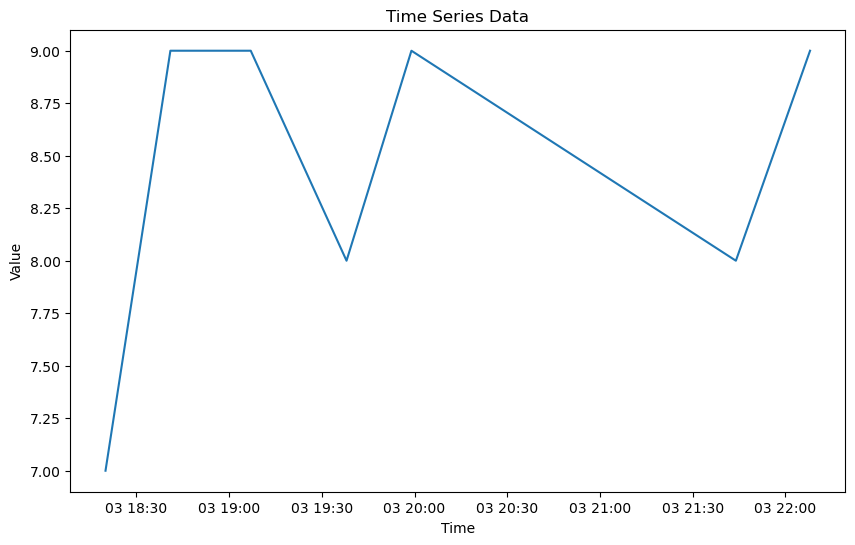

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:17 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:11:00  6.214137    4.658498    7.712419
1  2012-04-03 18:13:00  6.134850    4.681410    7.618692
2  2012-04-03 18:19:00  5.896989    4.422599    7.487854
3  2012-04-03 18:48:00  4.747325    3.330044    6.251264
4  2012-04-03 18:58:00  4.350890    2.888711    5.878638
5  2012-04-03 19:08:00  3.954454    2.523992    5.364087
6  2012-04-03 19:18:00  3.558019    2.123790    5.056741
7  2012-04-03 19:28:00  3.161583    1.751611    4.556359
8  2012-04-03 19:38:00  2.765147    1.411972    4.230868
9  2012-04-03 19:48:00  2.368712    0.732046    3.711553
10 2012-04-03 19:58:00  1.972276    0.529497    3.434999
11 2012-04-03 20:08:00  1.575840    0.232520    3.135623
12 2012-04-03 20:18:00  1.179405   -0.282600    2.609194
13 2012-04-03 20:28:00  0.782969   -0.746832    2.241566


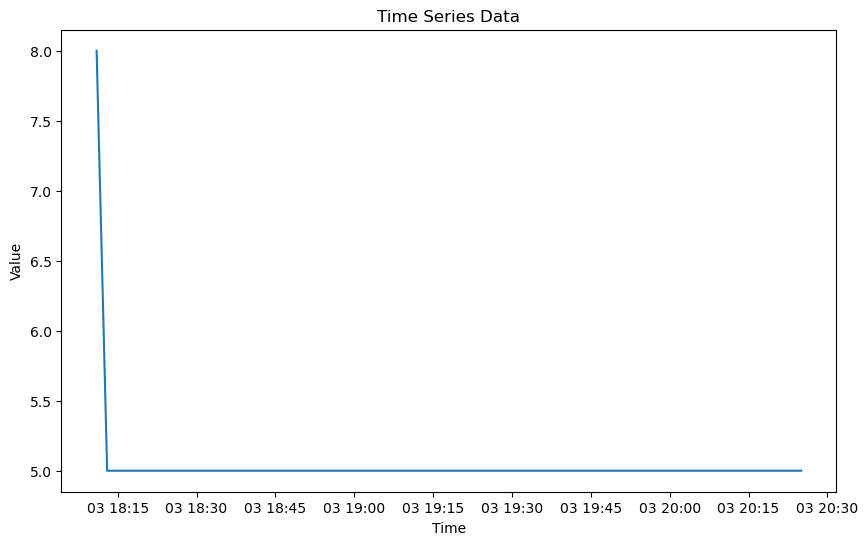

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:17 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 19:10:00  6.987432    6.389288    7.509541
1  2012-04-03 19:28:00  6.565891    5.961413    7.101603
2  2012-04-03 19:37:00  6.355120    5.828780    6.949471
3  2012-04-03 20:31:00  5.090497    4.505578    5.632552
4  2012-04-03 20:41:00  4.856307    4.306601    5.403280
5  2012-04-03 20:51:00  4.622118    4.049286    5.179784
6  2012-04-03 21:01:00  4.387928    3.813923    4.889597
7  2012-04-03 21:11:00  4.153739    3.556756    4.708129
8  2012-04-03 21:21:00  3.919549    3.357625    4.495559
9  2012-04-03 21:31:00  3.685360    3.170465    4.227340
10 2012-04-03 21:41:00  3.451170    2.930063    3.997947
11 2012-04-03 21:51:00  3.216981    2.662105    3.786358
12 2012-04-03 22:01:00  2.982791    2.422520    3.543145
13 2012-04-03 22:11:00  2.748602    2.176861    3.301154


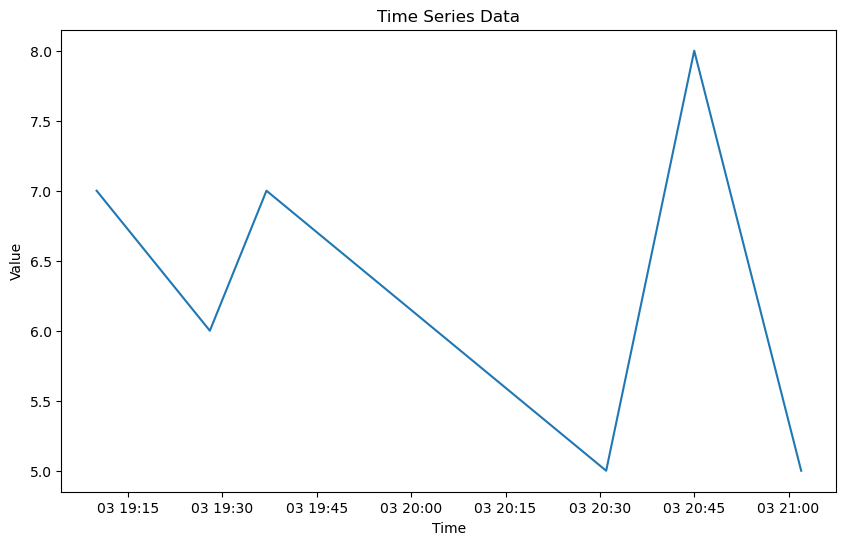

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:17 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:02:00  7.113027    6.070822    8.113520
1  2012-04-03 18:11:00  7.162403    6.100099    8.214035
2  2012-04-03 18:48:00  7.365393    6.328788    8.393925
3  2012-04-03 18:51:00  7.381851    6.330860    8.499029
4  2012-04-03 19:01:00  7.436713    6.289753    8.501296
5  2012-04-03 19:11:00  7.491576    6.406065    8.537069
6  2012-04-03 19:21:00  7.546438    6.470462    8.645167
7  2012-04-03 19:31:00  7.601300    6.534837    8.703589
8  2012-04-03 19:41:00  7.656162    6.662276    8.701285
9  2012-04-03 19:51:00  7.711024    6.668465    8.785479
10 2012-04-03 20:01:00  7.765886    6.748924    8.800159
11 2012-04-03 20:11:00  7.820748    6.798037    8.876070
12 2012-04-03 20:21:00  7.875610    6.874295    8.979406
13 2012-04-03 20:31:00  7.930473    7.011832    8.972142


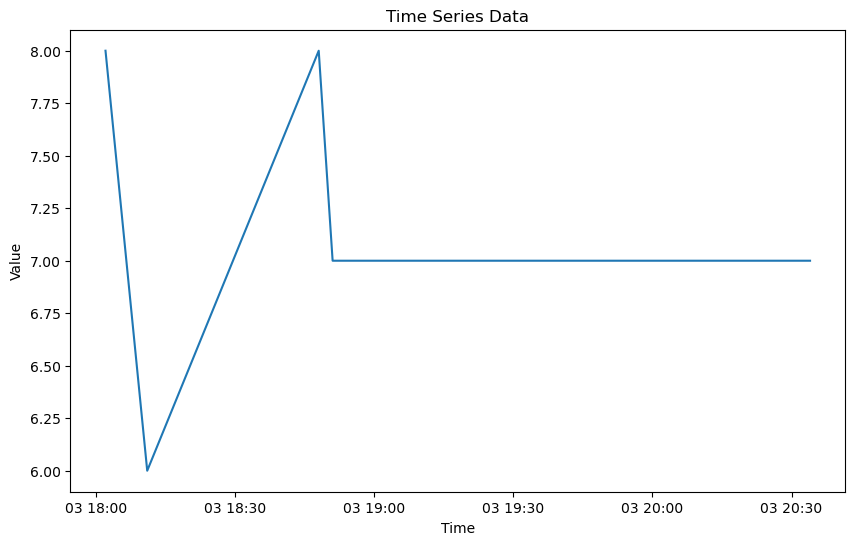

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:18 - cmdstanpy - INFO - Chain [1] start proc

                    ds       yhat  yhat_lower  yhat_upper
0  2012-04-03 18:00:00   6.635289    4.913697    8.229774
1  2012-04-03 18:11:00   7.068804    5.403905    8.730788
2  2012-04-03 18:38:00   8.132888    6.400034    9.882636
3  2012-04-03 19:04:00   9.157561    7.510985   10.821367
4  2012-04-03 19:14:00   9.551667    7.801117   11.216471
5  2012-04-03 19:24:00   9.945772    8.347770   11.638747
6  2012-04-03 19:34:00  10.339877    8.659121   11.938840
7  2012-04-03 19:44:00  10.733982    9.179747   12.404161
8  2012-04-03 19:54:00  11.128087    9.362026   12.719205
9  2012-04-03 20:04:00  11.522192    9.857359   13.118625
10 2012-04-03 20:14:00  11.916297   10.162441   13.505305
11 2012-04-03 20:24:00  12.310402   10.721058   13.979630
12 2012-04-03 20:34:00  12.704507   11.009612   14.411571
13 2012-04-03 20:44:00  13.098613   11.588961   14.698862


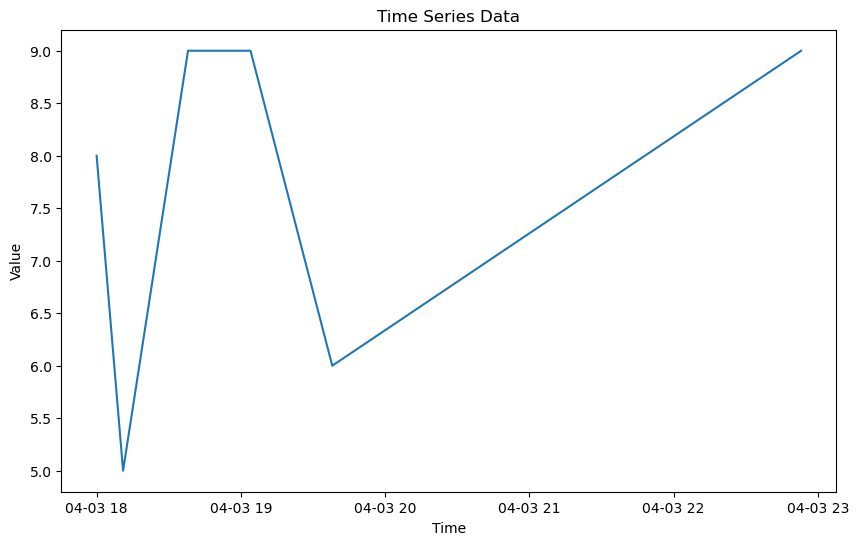

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:18 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:38:00  7.474640    5.650214    9.348493
1  2012-04-03 19:15:00  7.325557    5.354516    9.300061
2  2012-04-03 19:56:00  7.160357    5.296069    9.041054
3  2012-04-03 20:28:00  7.031420    5.253627    8.797711
4  2012-04-03 20:38:00  6.991127    4.919847    8.821726
5  2012-04-03 20:48:00  6.950835    5.104096    8.760075
6  2012-04-03 20:58:00  6.910542    5.147566    8.755719
7  2012-04-03 21:08:00  6.870249    5.198791    8.688583
8  2012-04-03 21:18:00  6.829957    4.947192    8.754257
9  2012-04-03 21:28:00  6.789664    4.851951    8.555809
10 2012-04-03 21:38:00  6.749371    4.793055    8.529288
11 2012-04-03 21:48:00  6.709078    4.823024    8.615288
12 2012-04-03 21:58:00  6.668786    4.986005    8.657070
13 2012-04-03 22:08:00  6.628493    4.619997    8.386953


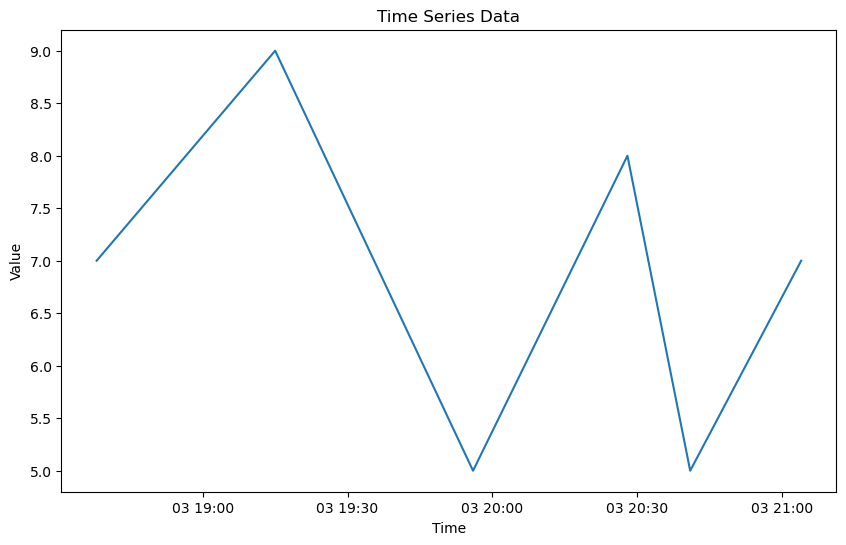

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:18 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:11:00  6.571378    5.561585    7.648998
1  2012-04-03 18:29:00  6.550836    5.380253    7.604455
2  2012-04-03 19:02:00  6.513178    5.374538    7.642132
3  2012-04-03 21:11:00  6.365966    5.192838    7.475821
4  2012-04-03 21:21:00  6.354555    5.242615    7.365592
5  2012-04-03 21:31:00  6.343143    5.341371    7.402319
6  2012-04-03 21:41:00  6.331731    5.254578    7.429136
7  2012-04-03 21:51:00  6.320319    5.205271    7.497214
8  2012-04-03 22:01:00  6.308908    5.168426    7.462431
9  2012-04-03 22:11:00  6.297496    5.183270    7.397858
10 2012-04-03 22:21:00  6.286084    5.164251    7.397853
11 2012-04-03 22:31:00  6.274672    5.182165    7.398033
12 2012-04-03 22:41:00  6.263261    5.201607    7.273971
13 2012-04-03 22:51:00  6.251849    5.102602    7.409803


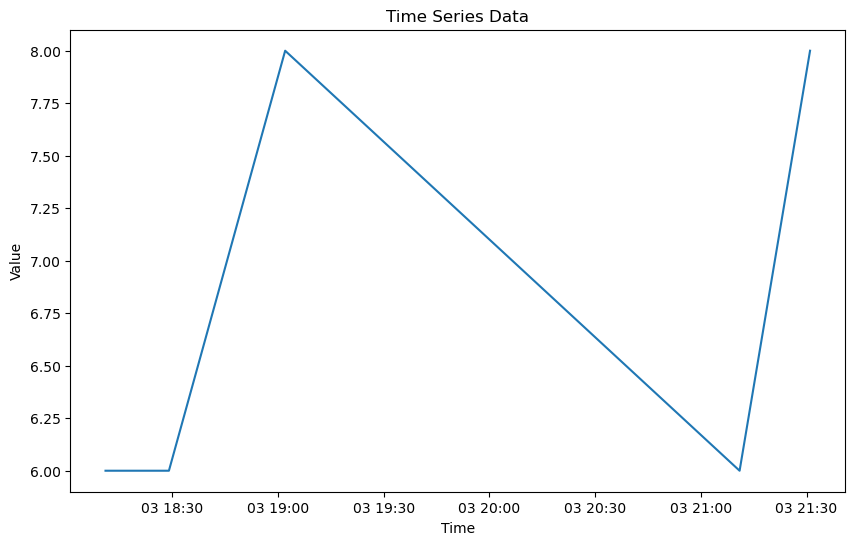

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:19 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 17:59:00  7.034891    6.053683    8.100497
1  2012-04-03 18:55:00  6.323672    5.224872    7.305478
2  2012-04-03 19:10:00  6.133167    5.211318    7.145897
3  2012-04-03 21:18:00  4.507525    3.512829    5.580381
4  2012-04-03 21:28:00  4.380522    3.331322    5.347073
5  2012-04-03 21:38:00  4.253518    3.254556    5.300541
6  2012-04-03 21:48:00  4.126515    3.063587    5.160128
7  2012-04-03 21:58:00  3.999512    2.983754    5.028358
8  2012-04-03 22:08:00  3.872508    2.796785    4.903222
9  2012-04-03 22:18:00  3.745505    2.697074    4.735304
10 2012-04-03 22:28:00  3.618502    2.549667    4.580582
11 2012-04-03 22:38:00  3.491498    2.450377    4.438487
12 2012-04-03 22:48:00  3.364495    2.327390    4.397601
13 2012-04-03 22:58:00  3.237492    2.237485    4.211764


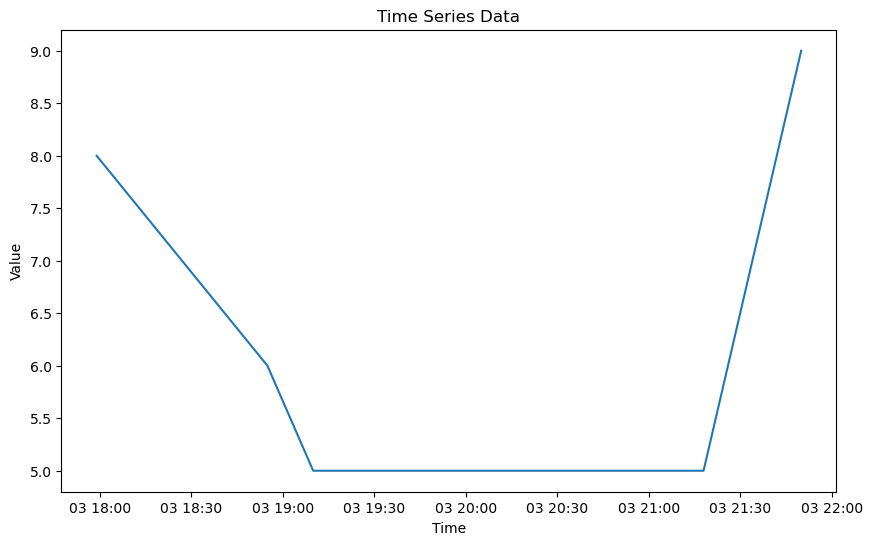

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:19 - cmdstanpy - INFO - Chain [1] start proc

                    ds       yhat  yhat_lower  yhat_upper
0  2012-04-03 18:49:00   4.821826    4.193596    5.485018
1  2012-04-03 19:26:00   5.970429    5.350709    6.563204
2  2012-04-03 19:52:00   6.777555    6.176671    7.406682
3  2012-04-03 20:13:00   7.429465    6.786007    8.064004
4  2012-04-03 20:23:00   7.739898    7.106492    8.340504
5  2012-04-03 20:33:00   8.050331    7.375762    8.696074
6  2012-04-03 20:43:00   8.360764    7.684626    8.978817
7  2012-04-03 20:53:00   8.671198    8.043542    9.303329
8  2012-04-03 21:03:00   8.981631    8.400782    9.607825
9  2012-04-03 21:13:00   9.292064    8.614899    9.902230
10 2012-04-03 21:23:00   9.602497    8.942940   10.236464
11 2012-04-03 21:33:00   9.912930    9.305439   10.559024
12 2012-04-03 21:43:00  10.223364    9.556011   10.848043
13 2012-04-03 21:53:00  10.533797    9.909837   11.152463


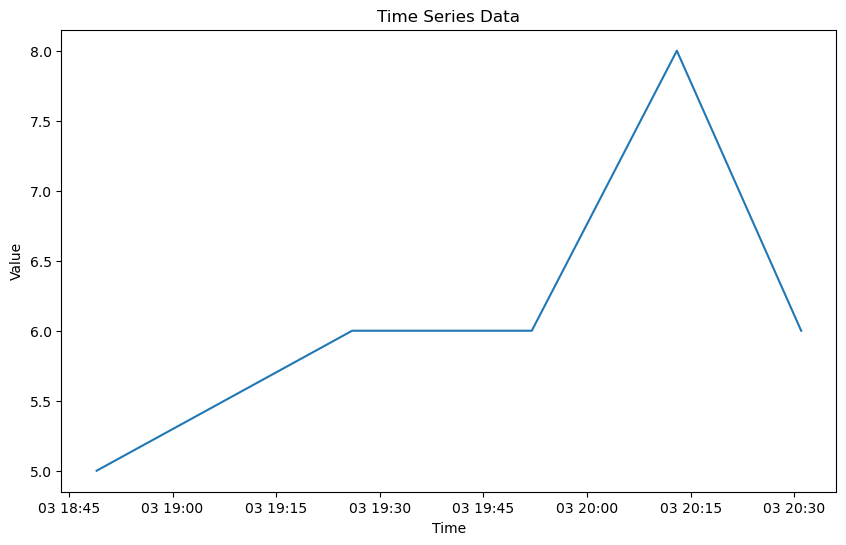

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:19 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:01:00  6.543638    5.172979    8.064848
1  2012-04-03 18:11:00  6.639945    5.176584    8.139988
2  2012-04-03 19:09:00  7.198523    5.716767    8.636586
3  2012-04-03 19:52:00  7.612642    6.159279    8.965929
4  2012-04-03 20:02:00  7.708948    6.349275    9.210043
5  2012-04-03 20:12:00  7.805255    6.477116    9.279540
6  2012-04-03 20:22:00  7.901562    6.379298    9.306292
7  2012-04-03 20:32:00  7.997868    6.688179    9.447744
8  2012-04-03 20:42:00  8.094175    6.516890    9.687063
9  2012-04-03 20:52:00  8.190481    6.668335    9.602713
10 2012-04-03 21:02:00  8.286788    6.961999    9.550091
11 2012-04-03 21:12:00  8.383095    6.982634    9.829206
12 2012-04-03 21:22:00  8.479401    7.060500    9.871950
13 2012-04-03 21:32:00  8.575708    7.148325    9.891017


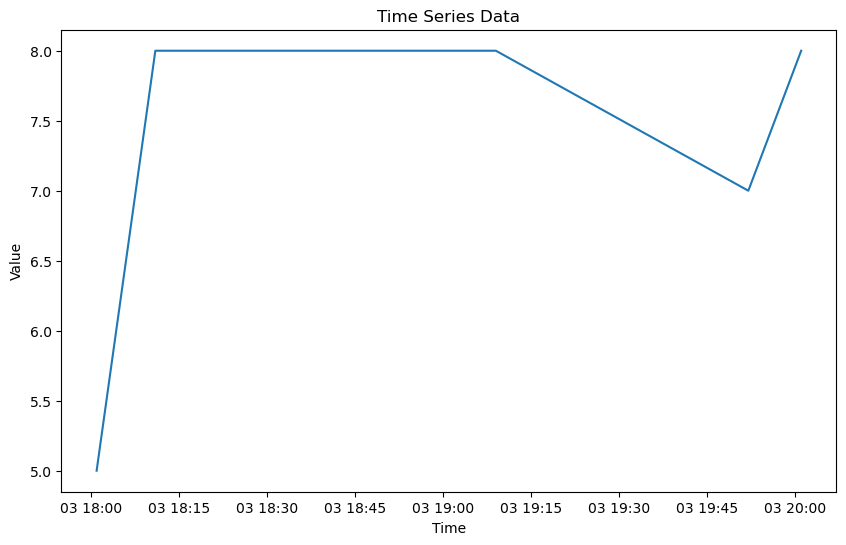

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:20 - cmdstanpy - INFO - Chain [1] start proc

                    ds       yhat  yhat_lower  yhat_upper
0  2012-04-03 18:06:00   7.131369    5.351421    8.808402
1  2012-04-03 18:20:00   7.387931    5.679972    9.191432
2  2012-04-03 19:12:00   8.340876    6.432154   10.012879
3  2012-04-03 19:22:00   8.524135    6.799871   10.348684
4  2012-04-03 19:32:00   8.707393    6.926550   10.573824
5  2012-04-03 19:42:00   8.890652    6.954327   10.728502
6  2012-04-03 19:52:00   9.073911    7.152765   10.980943
7  2012-04-03 20:02:00   9.257170    7.378741   10.925583
8  2012-04-03 20:12:00   9.440428    7.580090   11.136958
9  2012-04-03 20:22:00   9.623687    7.842922   11.447924
10 2012-04-03 20:32:00   9.806946    8.076299   11.649783
11 2012-04-03 20:42:00   9.990205    8.240997   11.826984
12 2012-04-03 20:52:00  10.173463    8.410332   11.968592


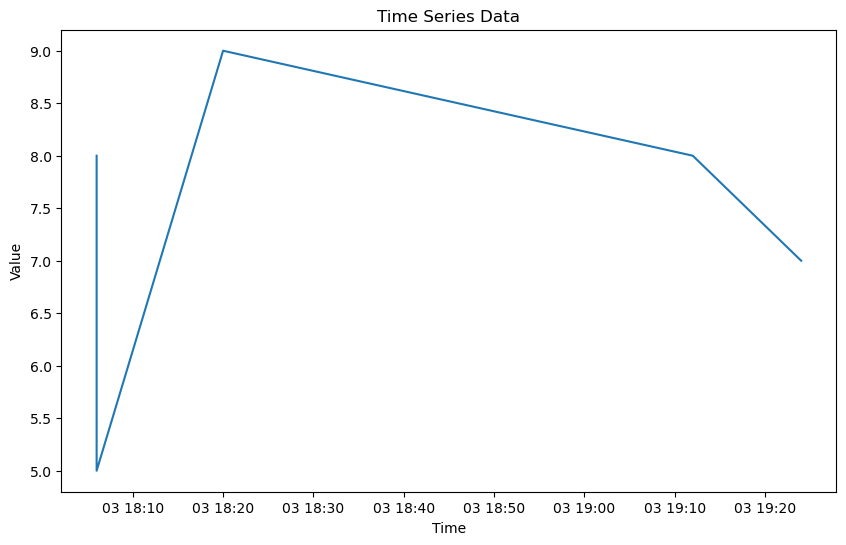

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:20 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:20:00  6.367160    4.793352    7.867387
1  2012-04-03 18:48:00  6.280057    4.614328    7.943840
2  2012-04-03 19:10:00  6.211618    4.657022    7.723501
3  2012-04-03 19:38:00  6.124515    4.418724    7.815079
4  2012-04-03 19:48:00  6.093407    4.580273    7.718753
5  2012-04-03 19:58:00  6.062299    4.360405    7.680941
6  2012-04-03 20:08:00  6.031191    4.384730    7.802506
7  2012-04-03 20:18:00  6.000082    4.303259    7.599139
8  2012-04-03 20:28:00  5.968974    4.379319    7.518417
9  2012-04-03 20:38:00  5.937866    4.293672    7.543086
10 2012-04-03 20:48:00  5.906757    4.185874    7.477936
11 2012-04-03 20:58:00  5.875649    4.325528    7.488224
12 2012-04-03 21:08:00  5.844541    4.269749    7.551738
13 2012-04-03 21:18:00  5.813433    4.112397    7.489334


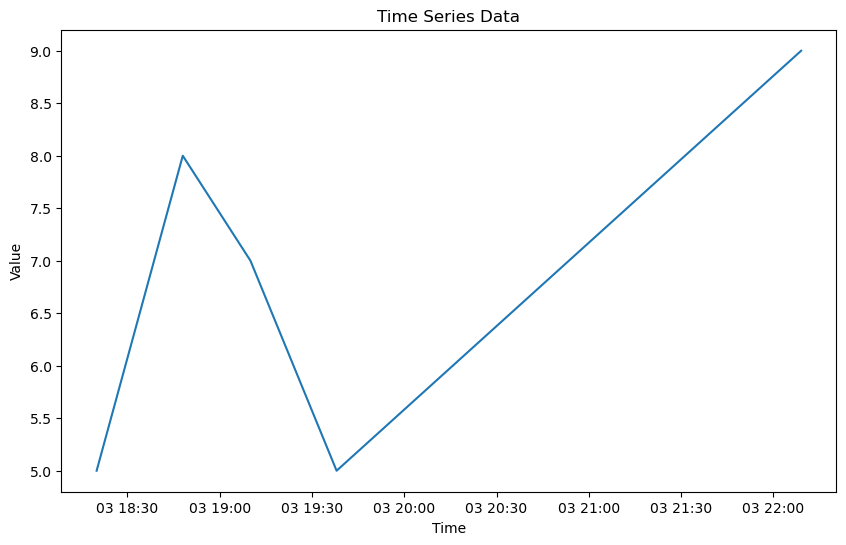

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:20 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:09:00  7.639909    6.275899    8.942994
1  2012-04-03 18:45:00  7.264097    5.926666    8.519373
2  2012-04-03 19:57:00  6.512473    5.123768    7.758534
3  2012-04-03 21:28:00  5.562503    4.245306    6.919310
4  2012-04-03 21:38:00  5.458111    4.054192    6.769854
5  2012-04-03 21:48:00  5.353719    3.932775    6.642610
6  2012-04-03 21:58:00  5.249327    3.962713    6.575969
7  2012-04-03 22:08:00  5.144934    3.846354    6.395211
8  2012-04-03 22:18:00  5.040542    3.765436    6.356336
9  2012-04-03 22:28:00  4.936150    3.549285    6.229718
10 2012-04-03 22:38:00  4.831758    3.486511    6.028008
11 2012-04-03 22:48:00  4.727365    3.407026    6.104838
12 2012-04-03 22:58:00  4.622973    3.361425    5.894747
13 2012-04-03 23:08:00  4.518581    3.263284    5.796332


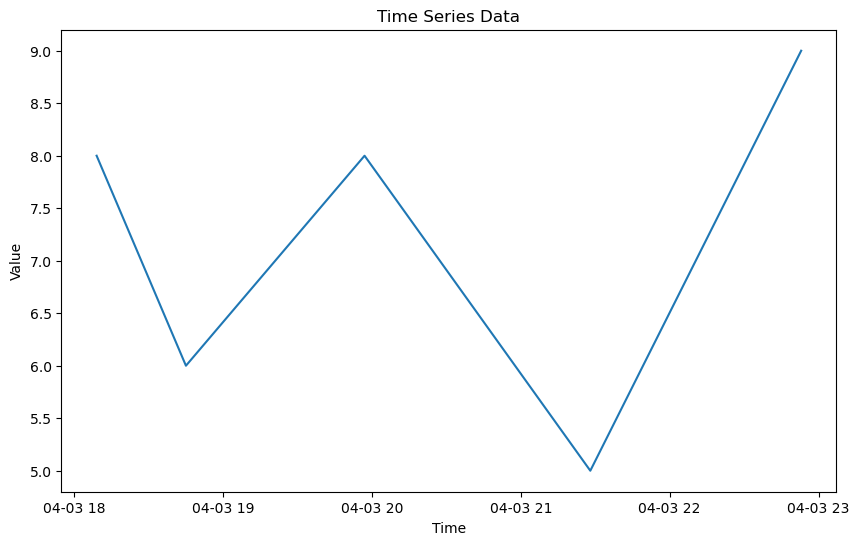

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:21 - cmdstanpy - INFO - Chain [1] start proc

                    ds       yhat  yhat_lower  yhat_upper
0  2012-04-03 19:05:00   4.459083    3.879856    5.116309
1  2012-04-03 19:31:00   5.651478    5.082870    6.253314
2  2012-04-03 20:05:00   7.210765    6.563960    7.820275
3  2012-04-03 20:37:00   8.678330    8.064623    9.280328
4  2012-04-03 20:47:00   9.136943    8.535460    9.755997
5  2012-04-03 20:57:00   9.595557    8.979412   10.187933
6  2012-04-03 21:07:00  10.054171    9.493193   10.640100
7  2012-04-03 21:17:00  10.512785    9.918240   11.108709
8  2012-04-03 21:27:00  10.971399   10.394486   11.578598
9  2012-04-03 21:37:00  11.430012   10.774793   11.989736
10 2012-04-03 21:47:00  11.888626   11.316103   12.477834
11 2012-04-03 21:57:00  12.347240   11.784786   12.940036
12 2012-04-03 22:07:00  12.805854   12.231658   13.377105
13 2012-04-03 22:17:00  13.264468   12.668764   13.851365


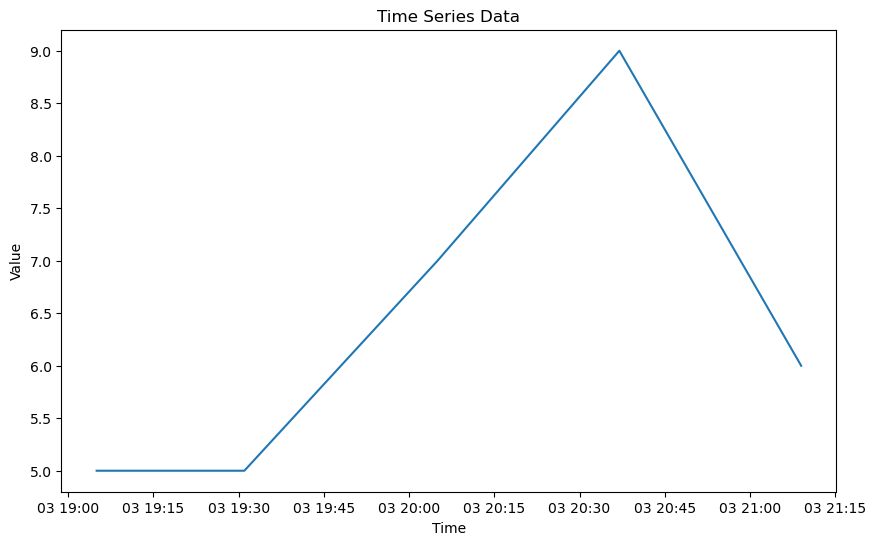

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:21 - cmdstanpy - INFO - Chain [1] start proc

                    ds       yhat  yhat_lower  yhat_upper
0  2012-04-03 19:03:00   7.095249    6.737820    7.404240
1  2012-04-03 19:58:00   8.654415    8.318163    8.963470
2  2012-04-03 20:19:00   9.249733    8.925414    9.580502
3  2012-04-03 20:29:00   9.533218    9.220567    9.849884
4  2012-04-03 20:39:00   9.816703    9.472533   10.124812
5  2012-04-03 20:49:00  10.100188    9.763697   10.420742
6  2012-04-03 20:59:00  10.383672   10.051268   10.694140
7  2012-04-03 21:09:00  10.667157   10.341169   10.979079
8  2012-04-03 21:19:00  10.950642   10.634515   11.260935
9  2012-04-03 21:29:00  11.234127   10.931257   11.577280
10 2012-04-03 21:39:00  11.517611   11.210714   11.866099
11 2012-04-03 21:49:00  11.801096   11.480039   12.128343
12 2012-04-03 21:59:00  12.084581   11.768145   12.415210


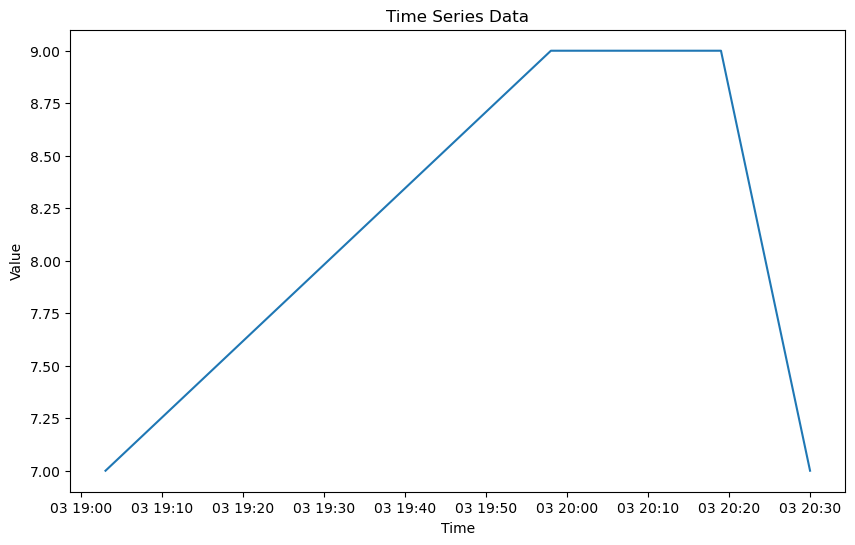

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:21 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:06:00  6.000000    6.000000    6.000000
1  2012-04-03 19:30:00  7.000000    7.000000    7.000000
2  2012-04-03 20:33:00  8.000000    8.000000    8.000000
3  2012-04-03 20:43:00  8.158730    8.158730    8.158730
4  2012-04-03 20:53:00  8.317460    8.317460    8.317460
5  2012-04-03 21:03:00  8.476190    8.472334    8.476190
6  2012-04-03 21:13:00  8.634921    8.612570    8.645267
7  2012-04-03 21:23:00  8.793651    8.746889    8.822200
8  2012-04-03 21:33:00  8.952381    8.880020    9.008802
9  2012-04-03 21:43:00  9.111111    9.019987    9.193145
10 2012-04-03 21:53:00  9.269841    9.149525    9.379640
11 2012-04-03 22:03:00  9.428571    9.266011    9.571144
12 2012-04-03 22:13:00  9.587302    9.381296    9.769560


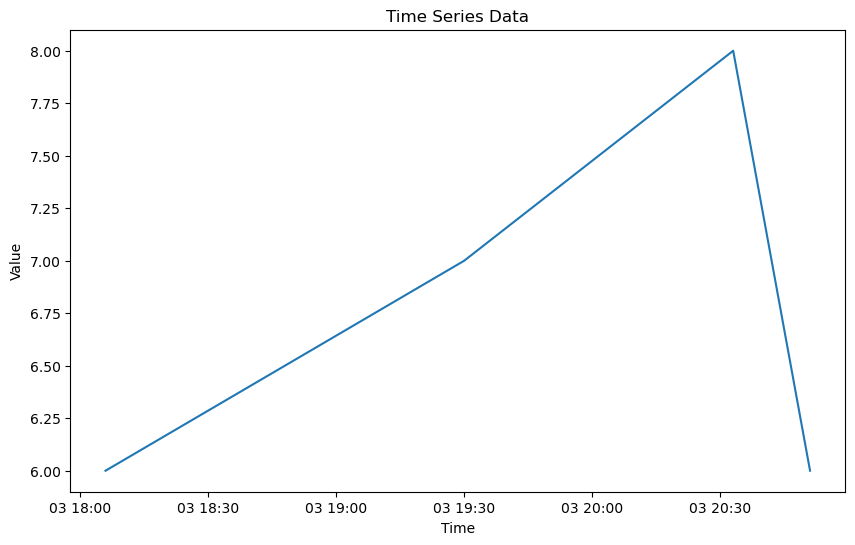

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:23 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:16:00  5.284900    4.350567    6.268956
1  2012-04-03 19:28:00  6.065376    5.123357    7.010411
2  2012-04-03 21:54:00  7.648006    6.673173    8.625023
3  2012-04-03 22:04:00  7.756406    6.788032    8.746220
4  2012-04-03 22:14:00  7.864805    6.893214    8.896953
5  2012-04-03 22:24:00  7.973204    7.009338    8.879981
6  2012-04-03 22:34:00  8.081604    7.147486    9.011185
7  2012-04-03 22:44:00  8.190003    7.224441    9.257839
8  2012-04-03 22:54:00  8.298403    7.345579    9.294992
9  2012-04-03 23:04:00  8.406802    7.423228    9.385419
10 2012-04-03 23:14:00  8.515201    7.576602    9.542807
11 2012-04-03 23:24:00  8.623601    7.677455    9.596760
12 2012-04-03 23:34:00  8.732000    7.800782    9.725426


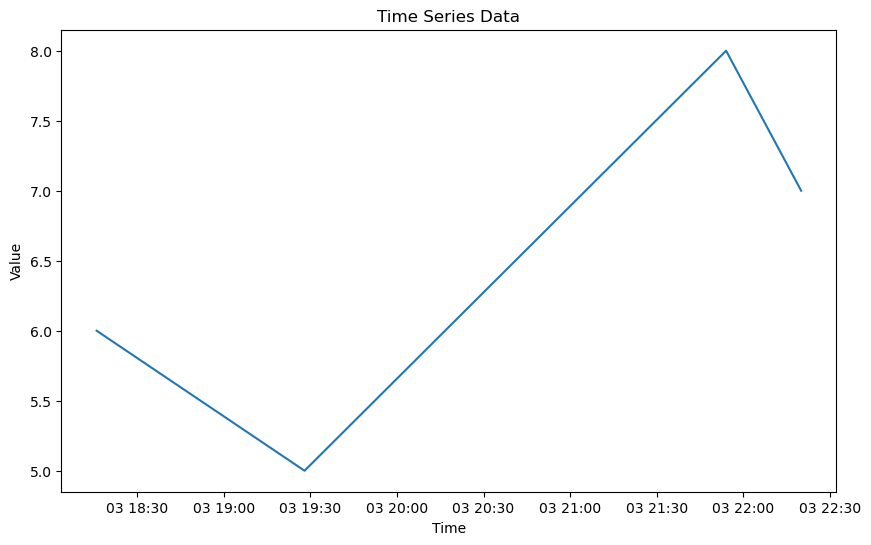

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:23 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:07:00  6.809525    5.187230    8.387044
1  2012-04-03 18:30:00  6.707473    5.146579    8.225778
2  2012-04-03 19:22:00  6.476746    4.915069    8.087387
3  2012-04-03 19:32:00  6.432376    4.861396    7.960174
4  2012-04-03 19:42:00  6.388005    4.820805    7.886037
5  2012-04-03 19:52:00  6.343635    4.775053    7.827597
6  2012-04-03 20:02:00  6.299264    4.814595    7.986620
7  2012-04-03 20:12:00  6.254894    4.762776    7.832793
8  2012-04-03 20:22:00  6.210524    4.555230    7.773499
9  2012-04-03 20:32:00  6.166153    4.658188    7.782847
10 2012-04-03 20:42:00  6.121783    4.588081    7.671488
11 2012-04-03 20:52:00  6.077412    4.571779    7.621037
12 2012-04-03 21:02:00  6.033042    4.467171    7.519232


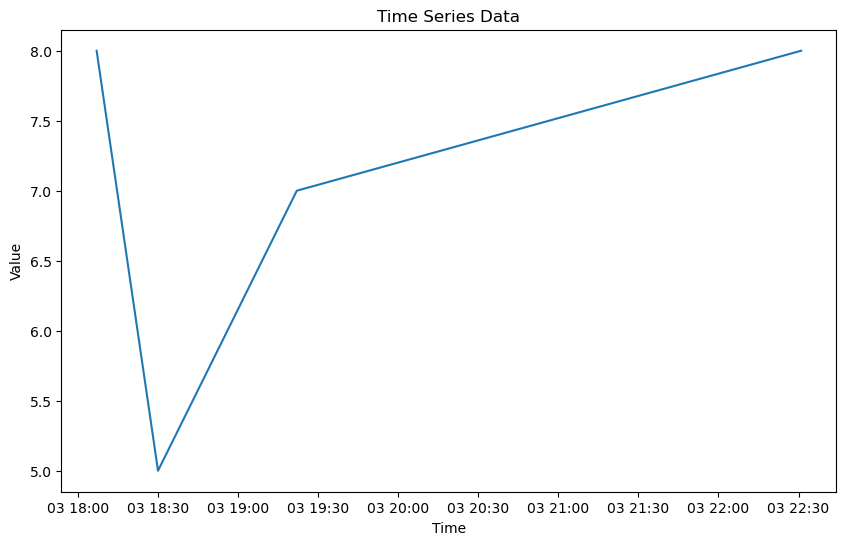

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:24 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:23:00  7.072935    6.992011    7.153674
1  2012-04-03 18:54:00  6.914187    6.835931    6.992989
2  2012-04-03 21:50:00  6.012908    5.931314    6.096539
3  2012-04-03 22:00:00  5.961699    5.878842    6.045561
4  2012-04-03 22:10:00  5.910490    5.833702    5.994250
5  2012-04-03 22:20:00  5.859281    5.778523    5.943742
6  2012-04-03 22:30:00  5.808072    5.719394    5.888926
7  2012-04-03 22:40:00  5.756863    5.669843    5.843216
8  2012-04-03 22:50:00  5.705654    5.621013    5.786779
9  2012-04-03 23:00:00  5.654445    5.572034    5.736274
10 2012-04-03 23:10:00  5.603236    5.519886    5.688795
11 2012-04-03 23:20:00  5.552027    5.468517    5.633782
12 2012-04-03 23:30:00  5.500818    5.413604    5.579055


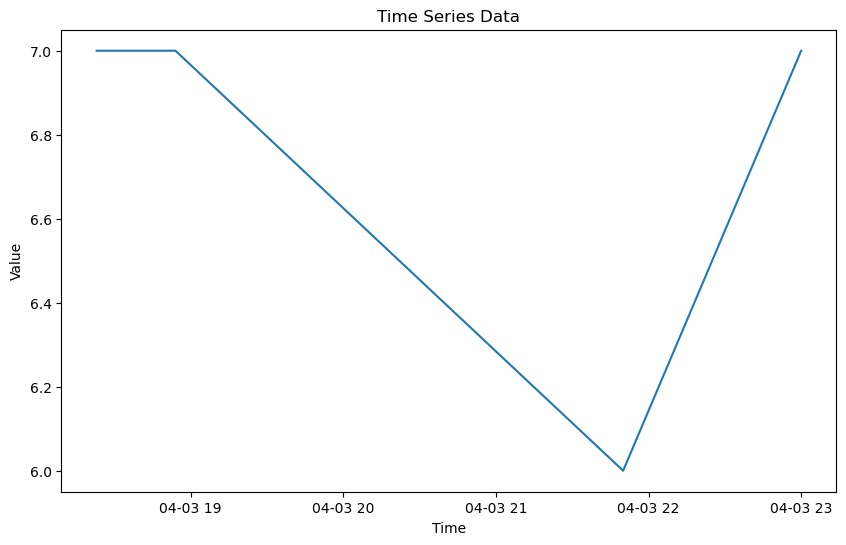

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:24 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 19:18:00  8.767421    8.142102    9.371246
1  2012-04-03 20:30:00  6.669514    6.037759    7.261430
2  2012-04-03 21:08:00  5.562286    4.975058    6.174840
3  2012-04-03 21:18:00  5.270910    4.682236    5.900593
4  2012-04-03 21:28:00  4.979534    4.362754    5.578035
5  2012-04-03 21:38:00  4.688158    4.079361    5.295706
6  2012-04-03 21:48:00  4.396782    3.811605    5.040002
7  2012-04-03 21:58:00  4.105406    3.490477    4.712943
8  2012-04-03 22:08:00  3.814030    3.219228    4.407387
9  2012-04-03 22:18:00  3.522654    2.911741    4.154410
10 2012-04-03 22:28:00  3.231278    2.629202    3.846385
11 2012-04-03 22:38:00  2.939902    2.356775    3.525254
12 2012-04-03 22:48:00  2.648526    2.016840    3.299389


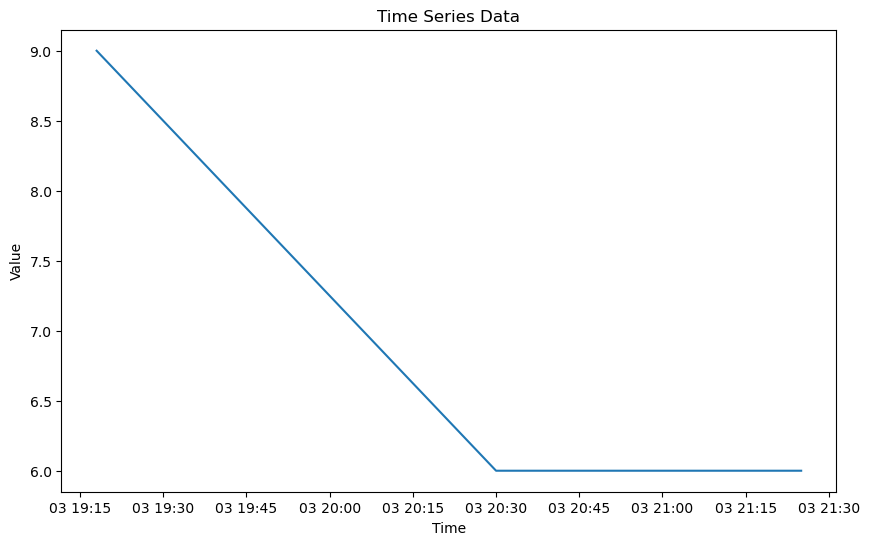

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:24 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:23:00  7.565175    7.095556    8.044341
1  2012-04-03 18:25:00  7.491630    6.979475    8.005154
2  2012-04-03 18:40:00  6.940042    6.479055    7.433557
3  2012-04-03 18:50:00  6.572317    6.065855    7.056803
4  2012-04-03 19:00:00  6.204591    5.698867    6.681892
5  2012-04-03 19:10:00  5.836866    5.353244    6.340878
6  2012-04-03 19:20:00  5.469141    4.988800    5.977112
7  2012-04-03 19:30:00  5.101415    4.600801    5.579407
8  2012-04-03 19:40:00  4.733690    4.245011    5.188640
9  2012-04-03 19:50:00  4.365964    3.864136    4.863764
10 2012-04-03 20:00:00  3.998239    3.517764    4.482124
11 2012-04-03 20:10:00  3.630513    3.122727    4.095162
12 2012-04-03 20:20:00  3.262788    2.770985    3.723412


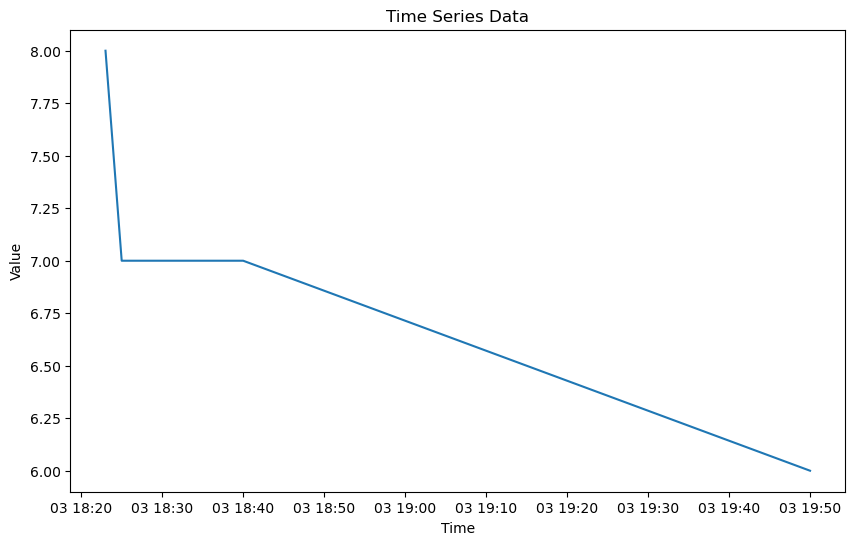

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:24 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:26:00  9.173964    8.252920   10.092742
1  2012-04-03 20:08:00  8.039724    7.065270    8.928906
2  2012-04-03 20:31:00  7.783964    6.806546    8.619139
3  2012-04-03 20:41:00  7.672764    6.687104    8.583706
4  2012-04-03 20:51:00  7.561564    6.660296    8.522112
5  2012-04-03 21:01:00  7.450364    6.525678    8.322352
6  2012-04-03 21:11:00  7.339164    6.425951    8.286091
7  2012-04-03 21:21:00  7.227964    6.247763    8.088274
8  2012-04-03 21:31:00  7.116764    6.233920    8.042841
9  2012-04-03 21:41:00  7.005564    6.031235    7.950248
10 2012-04-03 21:51:00  6.894364    5.960204    7.791375
11 2012-04-03 22:01:00  6.783164    5.844248    7.702077
12 2012-04-03 22:11:00  6.671964    5.742926    7.596770


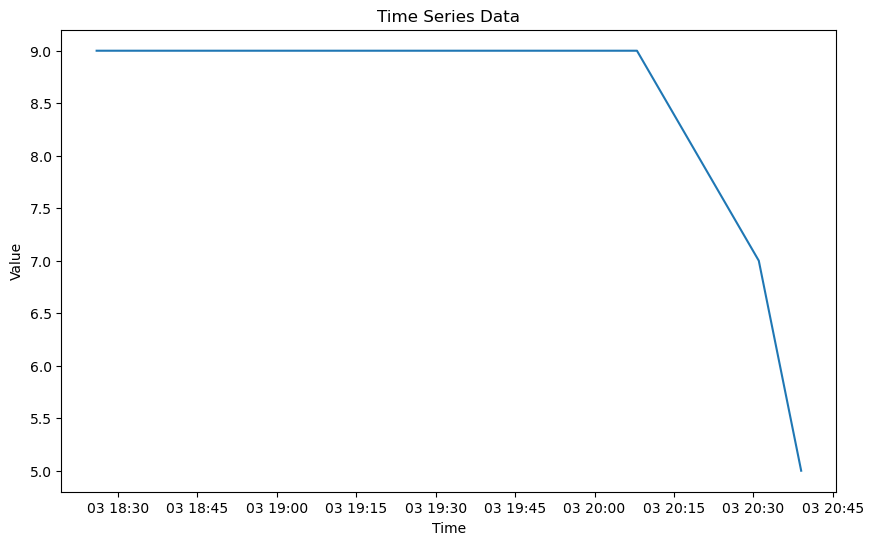

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:25 - cmdstanpy - INFO - Chain [1] start proc

                    ds       yhat  yhat_lower  yhat_upper
0  2012-04-03 18:05:00   7.000000    7.000000    7.000000
1  2012-04-03 18:11:00   6.000000    6.000000    6.000000
2  2012-04-03 18:21:00   4.333333    4.333333    4.333333
3  2012-04-03 18:31:00   2.666667    2.666666    2.666667
4  2012-04-03 18:41:00   1.000000    0.999999    1.000001
5  2012-04-03 18:51:00  -0.666667   -0.666668   -0.666666
6  2012-04-03 19:01:00  -2.333333   -2.333335   -2.333332
7  2012-04-03 19:11:00  -4.000000   -4.000002   -3.999999
8  2012-04-03 19:21:00  -5.666667   -5.666669   -5.666665
9  2012-04-03 19:31:00  -7.333333   -7.333336   -7.333331
10 2012-04-03 19:41:00  -9.000000   -9.000003   -8.999997
11 2012-04-03 19:51:00 -10.666667  -10.666671  -10.666663


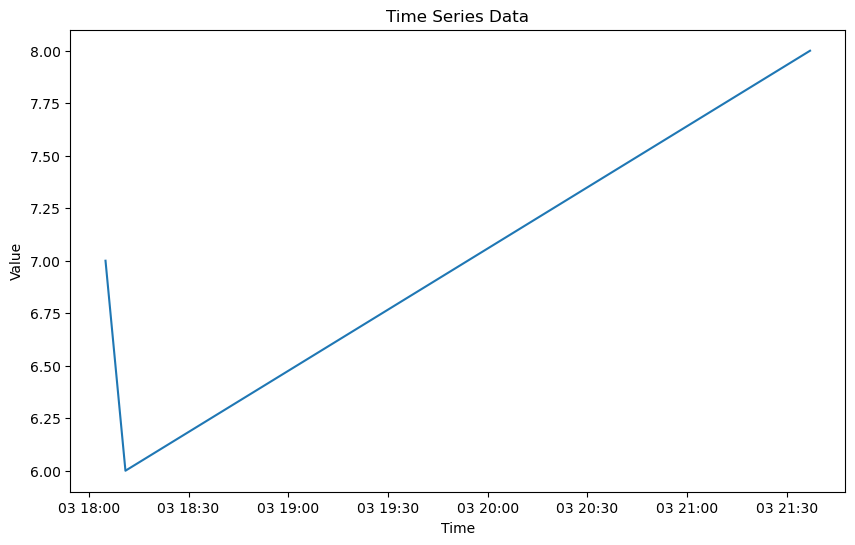

                    ds  yhat  yhat_lower  yhat_upper
0  2012-04-03 18:19:00   9.0         9.0         9.0
1  2012-04-03 20:13:00   9.0         9.0         9.0
2  2012-04-03 20:23:00   9.0         9.0         9.0
3  2012-04-03 20:33:00   9.0         9.0         9.0
4  2012-04-03 20:43:00   9.0         9.0         9.0
5  2012-04-03 20:53:00   9.0         9.0         9.0
6  2012-04-03 21:03:00   9.0         9.0         9.0
7  2012-04-03 21:13:00   9.0         9.0         9.0
8  2012-04-03 21:23:00   9.0         9.0         9.0
9  2012-04-03 21:33:00   9.0         9.0         9.0
10 2012-04-03 21:43:00   9.0         9.0         9.0
11 2012-04-03 21:53:00   9.0         9.0         9.0


/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()


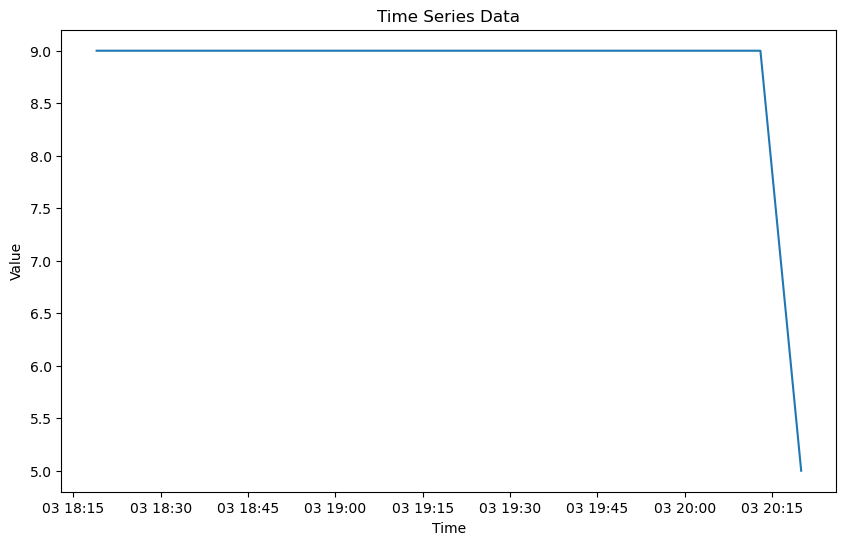

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()


                    ds  yhat  yhat_lower  yhat_upper
0  2012-04-03 18:41:00   9.0         9.0         9.0
1  2012-04-03 19:16:00   9.0         9.0         9.0
2  2012-04-03 19:26:00   9.0         9.0         9.0
3  2012-04-03 19:36:00   9.0         9.0         9.0
4  2012-04-03 19:46:00   9.0         9.0         9.0
5  2012-04-03 19:56:00   9.0         9.0         9.0
6  2012-04-03 20:06:00   9.0         9.0         9.0
7  2012-04-03 20:16:00   9.0         9.0         9.0
8  2012-04-03 20:26:00   9.0         9.0         9.0
9  2012-04-03 20:36:00   9.0         9.0         9.0
10 2012-04-03 20:46:00   9.0         9.0         9.0
11 2012-04-03 20:56:00   9.0         9.0         9.0


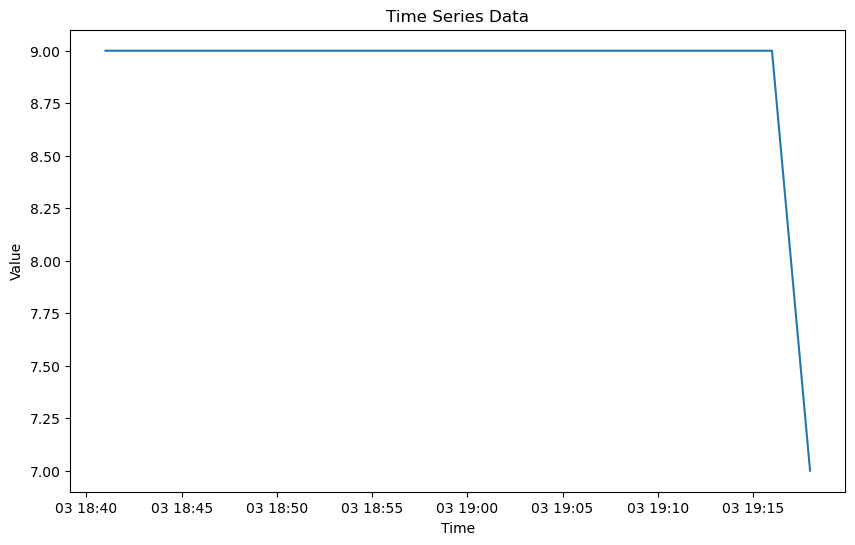

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:26 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:44:00  8.000000    8.000000    8.000000
1  2012-04-03 21:32:00  9.000000    9.000000    9.000000
2  2012-04-03 21:42:00  9.059524    9.059524    9.059524
3  2012-04-03 21:52:00  9.119048    9.119048    9.119048
4  2012-04-03 22:02:00  9.178571    9.178571    9.178571
5  2012-04-03 22:12:00  9.238095    9.238095    9.238095
6  2012-04-03 22:22:00  9.297619    9.297619    9.297619
7  2012-04-03 22:32:00  9.357143    9.357143    9.357143
8  2012-04-03 22:42:00  9.416667    9.416667    9.416667
9  2012-04-03 22:52:00  9.476191    9.476191    9.476191
10 2012-04-03 23:02:00  9.535714    9.535714    9.535714
11 2012-04-03 23:12:00  9.595238    9.595238    9.595238


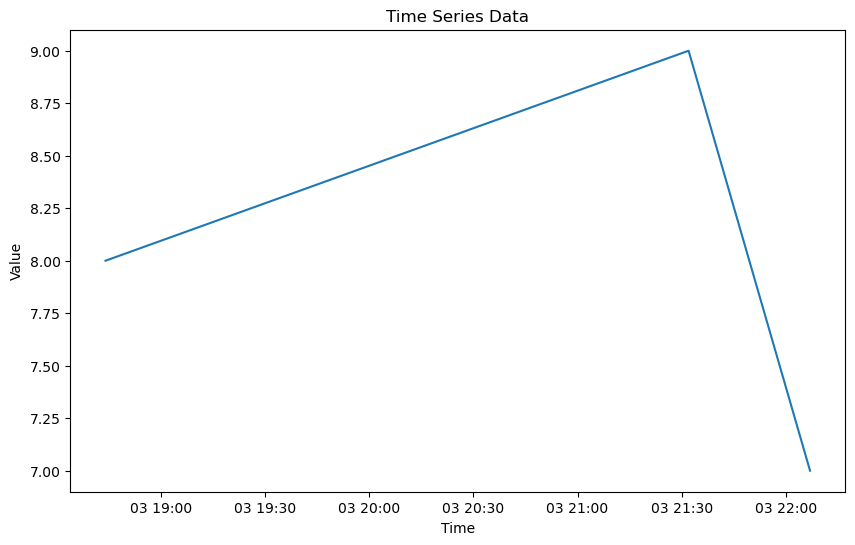

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:27 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:47:00  9.000000    9.000000    9.000000
1  2012-04-03 19:29:00  5.000000    5.000000    5.000000
2  2012-04-03 19:39:00  4.047619    4.047619    4.047619
3  2012-04-03 19:49:00  3.095238    3.095238    3.095238
4  2012-04-03 19:59:00  2.142857    2.142857    2.142857
5  2012-04-03 20:09:00  1.190476    1.190476    1.190476
6  2012-04-03 20:19:00  0.238095    0.238095    0.238095
7  2012-04-03 20:29:00 -0.714286   -0.714286   -0.714285
8  2012-04-03 20:39:00 -1.666667   -1.666667   -1.666666
9  2012-04-03 20:49:00 -2.619048   -2.619048   -2.619047
10 2012-04-03 20:59:00 -3.571428   -3.571429   -3.571428
11 2012-04-03 21:09:00 -4.523809   -4.523810   -4.523809


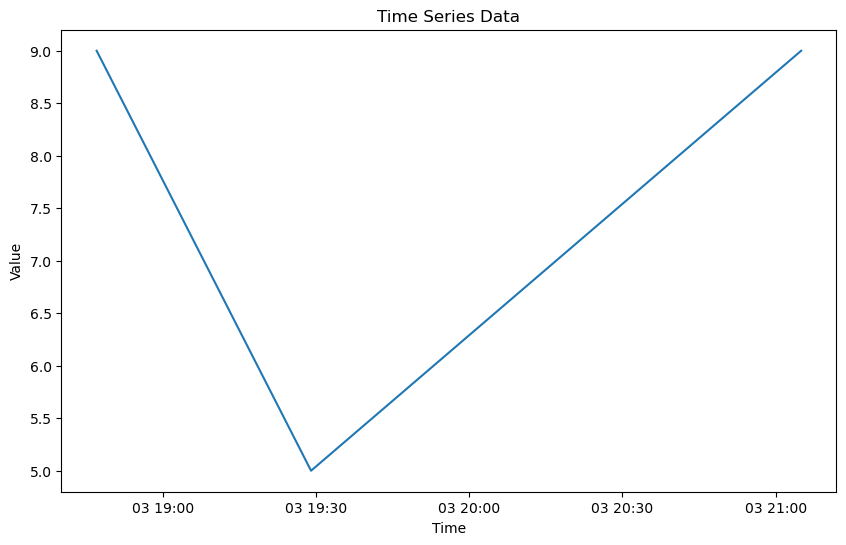

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:27 - cmdstanpy - INFO - Chain [1] start proc

                    ds       yhat  yhat_lower  yhat_upper
0  2012-04-03 18:40:00   7.000000    7.000000    7.000000
1  2012-04-03 19:53:00   9.000000    9.000000    9.000000
2  2012-04-03 20:03:00   9.273973    9.273973    9.273973
3  2012-04-03 20:13:00   9.547945    9.547945    9.547945
4  2012-04-03 20:23:00   9.821918    9.821918    9.821918
5  2012-04-03 20:33:00  10.095890   10.095890   10.095890
6  2012-04-03 20:43:00  10.369863   10.369863   10.369863
7  2012-04-03 20:53:00  10.643836   10.643836   10.643836
8  2012-04-03 21:03:00  10.917808   10.917808   10.917808
9  2012-04-03 21:13:00  11.191781   11.191781   11.191781
10 2012-04-03 21:23:00  11.465754   11.465753   11.465754
11 2012-04-03 21:33:00  11.739726   11.739726   11.739726


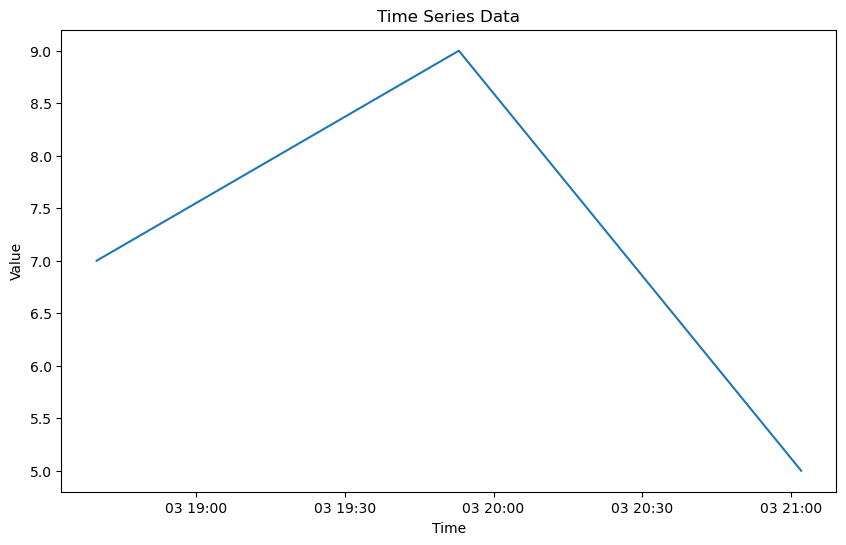

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:30 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 17:59:00  7.000000    7.000000    7.000000
1  2012-04-03 19:25:00  8.000000    8.000000    8.000000
2  2012-04-03 19:35:00  8.116279    8.116279    8.116279
3  2012-04-03 19:45:00  8.232558    8.232558    8.232558
4  2012-04-03 19:55:00  8.348837    8.348837    8.348837
5  2012-04-03 20:05:00  8.465116    8.465116    8.465116
6  2012-04-03 20:15:00  8.581395    8.581395    8.581395
7  2012-04-03 20:25:00  8.697674    8.697674    8.697674
8  2012-04-03 20:35:00  8.813953    8.813953    8.813954
9  2012-04-03 20:45:00  8.930233    8.930232    8.930233
10 2012-04-03 20:55:00  9.046512    9.046512    9.046512
11 2012-04-03 21:05:00  9.162791    9.162791    9.162791


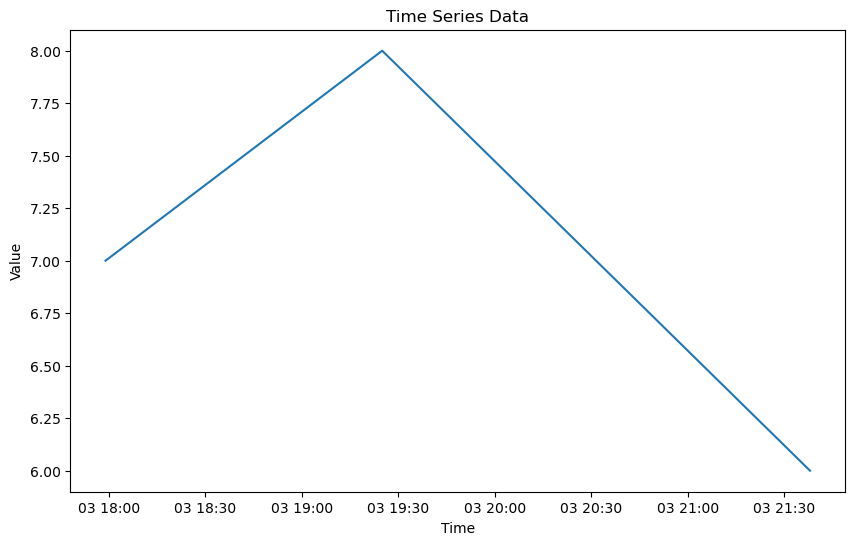

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/1470173120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
22:30:30 - cmdstanpy - INFO - Chain [1] start proc

RuntimeError: Error during optimization! Command '/Users/danahammouri/anaconda3/lib/python3.11/site-packages/prophet/stan_model/prophet_model.bin random seed=89429 data file=/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/tmpr9_mmx_6/y7zdp473.json init=/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/tmpr9_mmx_6/h4xd7ho3.json output file=/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/tmpr9_mmx_6/prophet_modeli8s2fjq6/prophet_model-20251216223030.csv method=optimize algorithm=newton iter=10000' failed: console log output:

method = optimize
  optimize
    algorithm = newton
      newton
    jacobian = false (Default)
    iter = 10000
    save_iterations = false (Default)
id = 1 (Default)
data
  file = /var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/tmpr9_mmx_6/y7zdp473.json
init = /var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/tmpr9_mmx_6/h4xd7ho3.json
random
  seed = 89429
output
  file = /var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/tmpr9_mmx_6/prophet_modeli8s2fjq6/prophet_model-20251216223030.csv
  diagnostic_file =  (Default)
  refresh = 100 (Default)
  sig_figs = 8 (Default)
  profile_file = profile.csv (Default)
  save_cmdstan_config = false (Default)
num_threads = 1 (Default)

Rejecting initial value:
  Error evaluating the log probability at the initial value.
Exception: normal_lpdf: Random variable is nan, but must be not nan! (in 'prophet.stan', line 130, column 2 to column 19)

User-specified initialization failed.
 Try specifying new initial values, using partially specialized initialization, reducing the range of constrained values, or reparameterizing the model.
Initialization failed.


In [15]:
def predict(target_loc):

    filtered_data = df[df['location'] == target_loc]

    filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
    filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()

    grouped = filtered_data.groupby(["_period"]).size().rename("count").reset_index()
    
    # Split 80% train, 20% test
    filtered_data = filtered_data.sort_values("appear_time")
    train_size = int(len(filtered_data) * 0.8)
    train = filtered_data.iloc[:train_size]
    test = filtered_data.iloc[train_size:]
    model = Prophet()
    # Fit the model
    model.fit(train.rename(columns={"appear_time": "ds", "reward": "y"}))

    # Create future dates dataframe 
    future = model.make_future_dataframe(periods=10, freq='10min') 

    # Make predictions 
    forecast = model.predict(future) 
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_data["appear_time"], filtered_data["reward"])
    plt.title('Time Series Data')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.show()

for loc in target_locs:
    predict(loc)

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
14:57:39 - cmdstanpy - INFO - Chain [1] start proc

                    ds       yhat  yhat_lower  yhat_upper
0  2012-04-03 18:03:00   6.687065    5.107509    8.143618
1  2012-04-03 18:09:29   6.858106    5.362569    8.397253
2  2012-04-03 18:15:05   7.005843    5.467679    8.575214
3  2012-04-03 18:17:17   7.063882    5.653145    8.584090
4  2012-04-03 18:19:21   7.118404    5.619639    8.637893
5  2012-04-03 18:35:31   7.544906    5.948371    9.068005
6  2012-04-03 18:42:03   7.717266    6.149613    9.191152
7  2012-04-03 18:52:03   7.981082    6.408937    9.469849
8  2012-04-03 19:02:03   8.244897    6.743026    9.714909
9  2012-04-03 19:12:03   8.508713    7.019228   10.072307
10 2012-04-03 19:22:03   8.772529    7.152164   10.225560
11 2012-04-03 19:32:03   9.036345    7.503153   10.522505
12 2012-04-03 19:42:03   9.300161    7.666608   10.787920
13 2012-04-03 19:52:03   9.563976    8.177242   11.158004
14 2012-04-03 20:02:03   9.827792    8.258904   11.215734
15 2012-04-03 20:12:03  10.091608    8.578117   11.609482
16 2012-04-03 

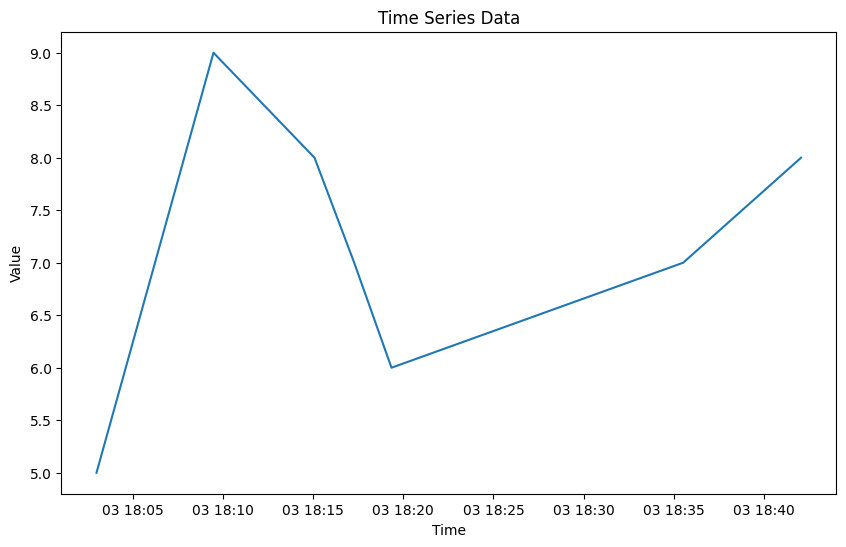

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
14:57:40 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:15:07  8.261380    6.990166    9.638852
1  2012-04-03 18:15:33  8.244659    6.960999    9.526748
2  2012-04-03 18:24:02  7.917296    6.587638    9.339424
3  2012-04-03 18:36:56  7.419500    6.157293    8.692749
4  2012-04-03 18:37:12  7.409210    6.218241    8.710658
5  2012-04-03 18:46:30  7.050329    5.751021    8.437251
6  2012-04-03 18:56:09  6.677943    5.389429    7.975779
7  2012-04-03 19:06:09  6.292050    4.898254    7.671500
8  2012-04-03 19:16:09  5.906157    4.557130    7.294158
9  2012-04-03 19:26:09  5.520265    4.208095    6.888866
10 2012-04-03 19:36:09  5.134372    3.802947    6.461436
11 2012-04-03 19:46:09  4.748479    3.417777    6.066316
12 2012-04-03 19:56:09  4.362587    3.108729    5.645819
13 2012-04-03 20:06:09  3.976694    2.546420    5.230280
14 2012-04-03 20:16:09  3.590801    2.219047    4.862666
15 2012-04-03 20:26:09  3.204909    1.893837    4.555151
16 2012-04-03 20:36:09  2.81901

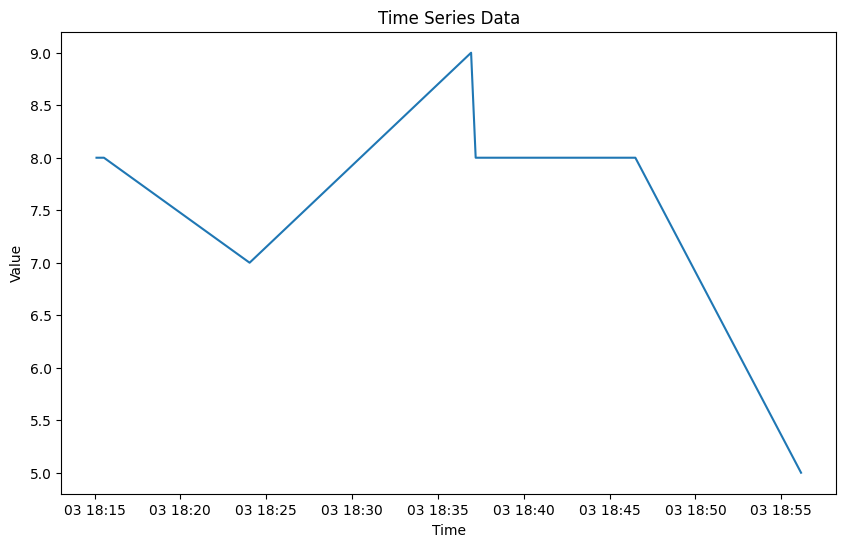

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
14:57:40 - cmdstanpy - INFO - Chain [1] start proc

                    ds       yhat  yhat_lower  yhat_upper
0  2012-04-03 18:02:41   6.893930    5.284404    8.365924
1  2012-04-03 18:07:15   7.050599    5.549186    8.501392
2  2012-04-03 18:08:57   7.108920    5.626710    8.679891
3  2012-04-03 18:12:27   7.228995    5.675487    8.846835
4  2012-04-03 18:39:34   8.159286    6.608928    9.692957
5  2012-04-03 18:51:03   8.553245    7.009759   10.076824
6  2012-04-03 19:01:03   8.896315    7.250035   10.533586
7  2012-04-03 19:11:03   9.239384    7.609338   10.804058
8  2012-04-03 19:21:03   9.582454    8.031883   11.246828
9  2012-04-03 19:31:03   9.925524    8.229232   11.464413
10 2012-04-03 19:41:03  10.268594    8.715716   11.840978
11 2012-04-03 19:51:03  10.611664    9.107518   12.154916
12 2012-04-03 20:01:03  10.954734    9.417940   12.541583
13 2012-04-03 20:11:03  11.297804    9.762214   12.873910
14 2012-04-03 20:21:03  11.640874   10.037621   13.170214
15 2012-04-03 20:31:03  11.983944   10.469227   13.420392


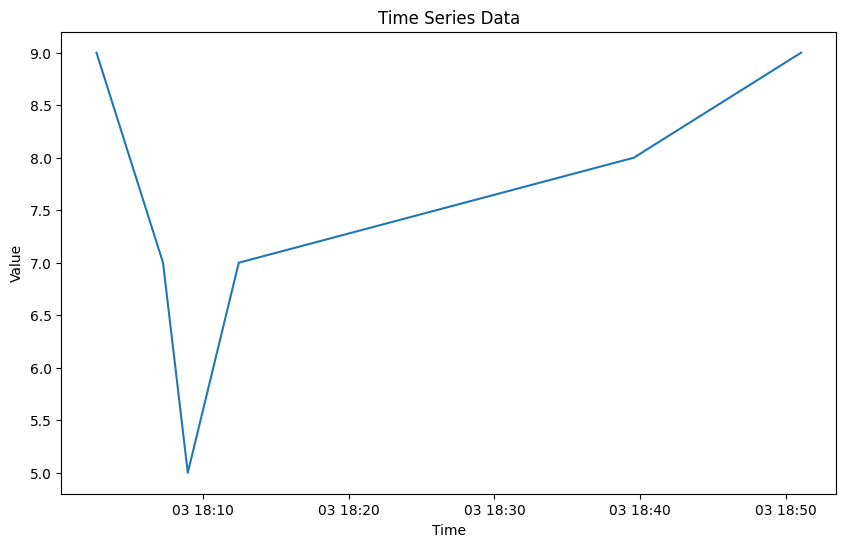

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
14:57:40 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:04:38  7.870510    6.265610    9.325849
1  2012-04-03 18:11:04  7.557143    6.114741    9.018317
2  2012-04-03 18:14:21  7.397212    5.881444    8.793951
3  2012-04-03 18:39:42  6.162415    4.743536    7.653431
4  2012-04-03 18:49:42  5.675316    4.257632    7.103362
5  2012-04-03 18:59:42  5.188216    3.696430    6.681762
6  2012-04-03 19:09:42  4.701117    3.269957    6.158379
7  2012-04-03 19:19:42  4.214018    2.758214    5.651284
8  2012-04-03 19:29:42  3.726918    2.271064    5.123322
9  2012-04-03 19:39:42  3.239819    1.770200    4.758467
10 2012-04-03 19:49:42  2.752720    1.383321    4.177905
11 2012-04-03 19:59:42  2.265620    0.870225    3.762085
12 2012-04-03 20:09:42  1.778521    0.406071    3.148043
13 2012-04-03 20:19:42  1.291422   -0.136195    2.765350


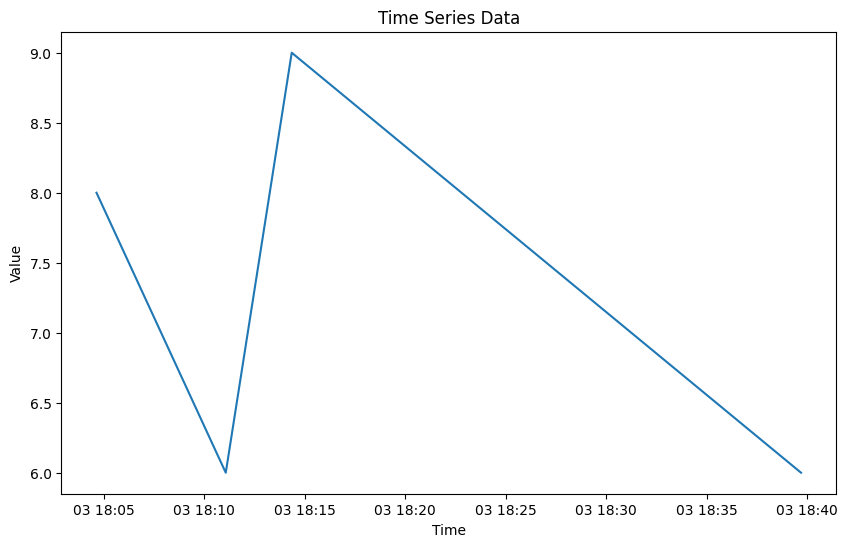

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
14:57:40 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:13:12  6.786855    5.328753    8.311847
1  2012-04-03 18:27:43  7.087724    5.434885    8.701893
2  2012-04-03 18:42:25  7.392393    5.861308    8.986325
3  2012-04-03 18:57:46  7.710534    6.061675    9.149473
4  2012-04-03 19:07:46  7.917792    6.318089    9.437299
5  2012-04-03 19:17:46  8.125049    6.473413    9.740786
6  2012-04-03 19:27:46  8.332307    6.773688    9.991943
7  2012-04-03 19:37:46  8.539565    6.955832   10.124608
8  2012-04-03 19:47:46  8.746823    7.196842   10.214605
9  2012-04-03 19:57:46  8.954081    7.363804   10.508926
10 2012-04-03 20:07:46  9.161339    7.463016   10.769060
11 2012-04-03 20:17:46  9.368597    7.778588   10.922389
12 2012-04-03 20:27:46  9.575854    7.911242   11.196626
13 2012-04-03 20:37:46  9.783112    8.241911   11.359854


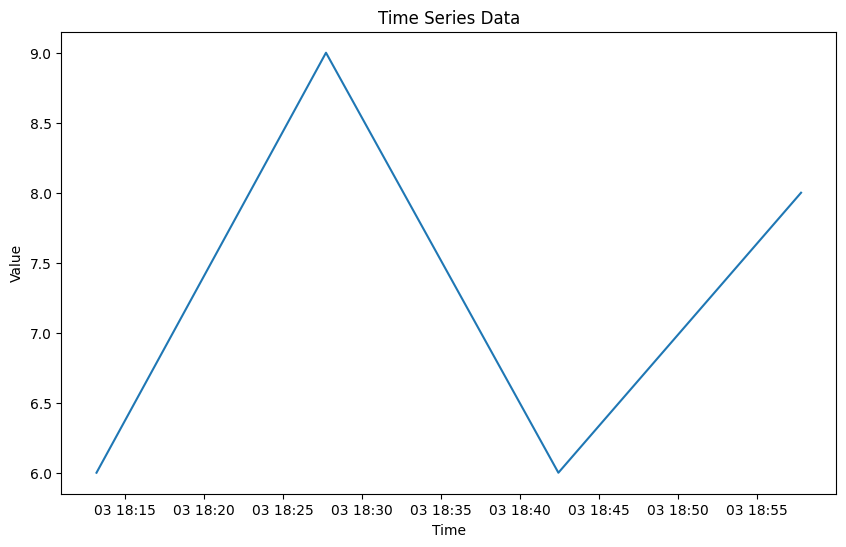

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
14:57:40 - cmdstanpy - INFO - Chain [1] start proc

                    ds       yhat  yhat_lower  yhat_upper
0  2012-04-03 18:04:42   7.200350    6.552922    7.875871
1  2012-04-03 18:19:28   8.110440    7.485667    8.782713
2  2012-04-03 18:21:33   8.238839    7.575648    8.891244
3  2012-04-03 18:24:58   8.449413    7.750516    9.107828
4  2012-04-03 18:34:58   9.065726    8.421504    9.784828
5  2012-04-03 18:44:58   9.682040    9.047171   10.351794
6  2012-04-03 18:54:58  10.298354    9.629640   10.984230
7  2012-04-03 19:04:58  10.914668   10.268629   11.543646
8  2012-04-03 19:14:58  11.530981   10.885107   12.212114
9  2012-04-03 19:24:58  12.147295   11.490236   12.752996
10 2012-04-03 19:34:58  12.763609   12.078026   13.389312
11 2012-04-03 19:44:58  13.379923   12.761945   14.080793
12 2012-04-03 19:54:58  13.996237   13.331204   14.740251
13 2012-04-03 20:04:58  14.612550   13.915947   15.277631


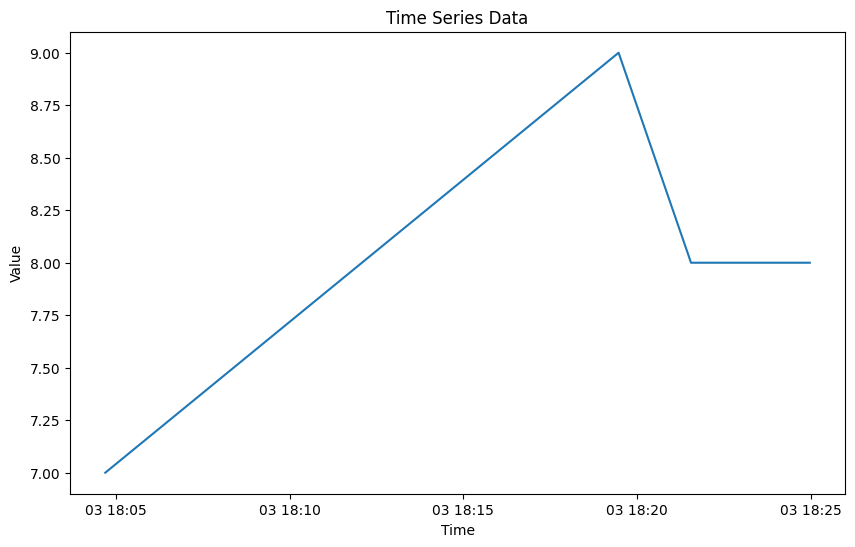

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
14:57:40 - cmdstanpy - INFO - Chain [1] start proc

                    ds       yhat  yhat_lower  yhat_upper
0  2012-04-03 18:06:18   7.000000    7.000000    7.000000
1  2012-04-03 18:06:19   7.000000    7.000000    7.000000
2  2012-04-03 18:34:55   8.000000    8.000000    8.000000
3  2012-04-03 18:44:55   8.349650    8.271756    8.462486
4  2012-04-03 18:54:55   8.699301    8.317986    9.123747
5  2012-04-03 19:04:55   9.048951    8.310482    9.840352
6  2012-04-03 19:14:55   9.398601    8.202007   10.735212
7  2012-04-03 19:24:55   9.748252    7.977442   11.669271
8  2012-04-03 19:34:55  10.097902    7.567430   12.781514
9  2012-04-03 19:44:55  10.447552    7.273262   13.930901
10 2012-04-03 19:54:55  10.797203    6.788720   15.149692
11 2012-04-03 20:04:55  11.146853    6.147462   16.388720
12 2012-04-03 20:14:55  11.496503    5.499489   17.477074


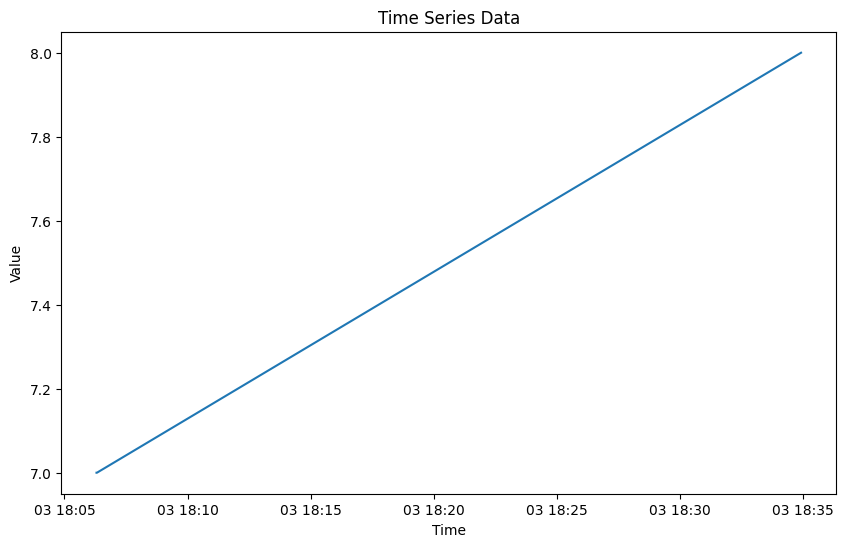

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
14:57:42 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:19:25  7.297838    6.553111    8.137682
1  2012-04-03 18:34:10  6.169930    5.404911    6.929138
2  2012-04-03 18:42:32  5.530145    4.758086    6.283569
3  2012-04-03 18:52:32  4.765461    4.060122    5.543689
4  2012-04-03 19:02:32  4.000778    3.228278    4.729405
5  2012-04-03 19:12:32  3.236094    2.496591    4.010461
6  2012-04-03 19:22:32  2.471411    1.691345    3.221773
7  2012-04-03 19:32:32  1.706727    0.936114    2.506665
8  2012-04-03 19:42:32  0.942044    0.205127    1.818260
9  2012-04-03 19:52:32  0.177360   -0.610142    0.954593
10 2012-04-03 20:02:32 -0.587323   -1.365406    0.143010
11 2012-04-03 20:12:32 -1.352007   -2.100095   -0.601633
12 2012-04-03 20:22:32 -2.116690   -2.886662   -1.374003


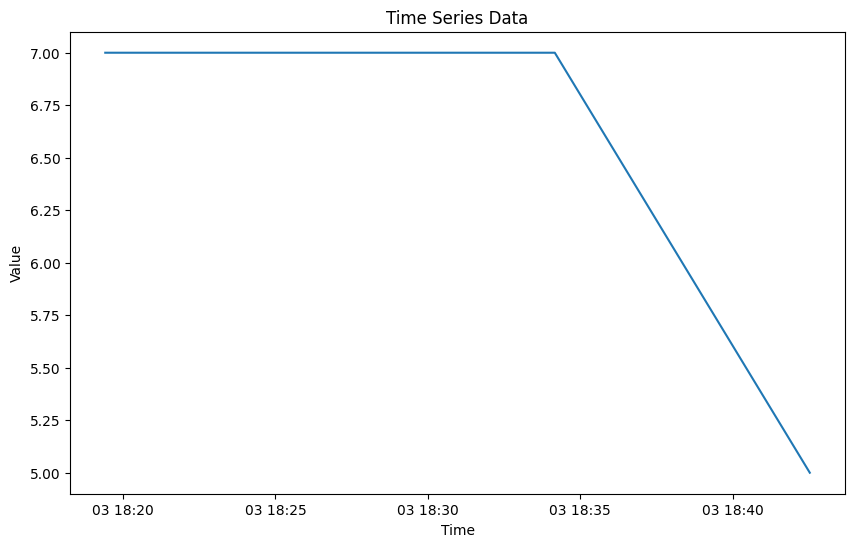

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
14:57:43 - cmdstanpy - INFO - Chain [1] start proc

                    ds       yhat  yhat_lower  yhat_upper
0  2012-04-03 18:00:09   9.000000    9.000000    9.000000
1  2012-04-03 18:02:24   8.000000    8.000000    8.000000
2  2012-04-03 18:09:06   6.000000    6.000000    6.000000
3  2012-04-03 18:19:06   3.014925    1.761427    4.257593
4  2012-04-03 18:29:06   0.029851   -3.904921    4.032675
5  2012-04-03 18:39:06  -2.955224  -10.505630    4.405283
6  2012-04-03 18:49:06  -5.940299  -17.889863    5.562405
7  2012-04-03 18:59:06  -8.925373  -25.841555    8.034884
8  2012-04-03 19:09:06 -11.910448  -34.580171   10.002079
9  2012-04-03 19:19:06 -14.895523  -43.360831   12.671531
10 2012-04-03 19:29:06 -17.880597  -51.746323   16.696730
11 2012-04-03 19:39:06 -20.865672  -61.942507   20.869053
12 2012-04-03 19:49:06 -23.850746  -72.646126   26.418802


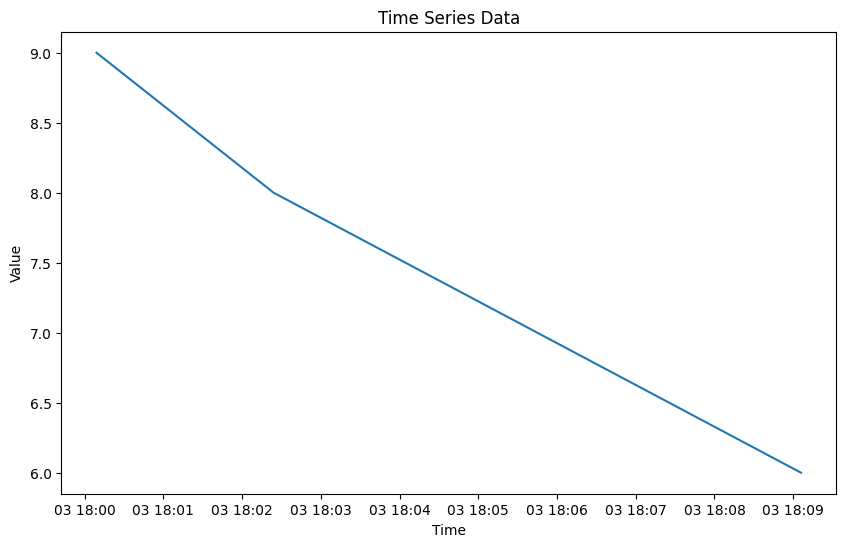

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
14:57:44 - cmdstanpy - INFO - Chain [1] start proc

                    ds       yhat  yhat_lower  yhat_upper
0  2012-04-03 18:31:32   7.677347    7.274062    8.119743
1  2012-04-03 18:32:11   7.447765    7.023796    7.860463
2  2012-04-03 18:33:49   6.870867    6.427331    7.289333
3  2012-04-03 18:43:49   3.338837    2.914216    3.741838
4  2012-04-03 18:53:49  -0.193193   -0.623715    0.216551
5  2012-04-03 19:03:49  -3.725224   -4.131616   -3.308059
6  2012-04-03 19:13:49  -7.257254   -7.678738   -6.851514
7  2012-04-03 19:23:49 -10.789284  -11.212157  -10.352366
8  2012-04-03 19:33:49 -14.321314  -14.756137  -13.896623
9  2012-04-03 19:43:49 -17.853345  -18.257241  -17.468672
10 2012-04-03 19:53:49 -21.385375  -21.810314  -20.938061
11 2012-04-03 20:03:49 -24.917405  -25.348868  -24.512707
12 2012-04-03 20:13:49 -28.449435  -28.826450  -28.022018


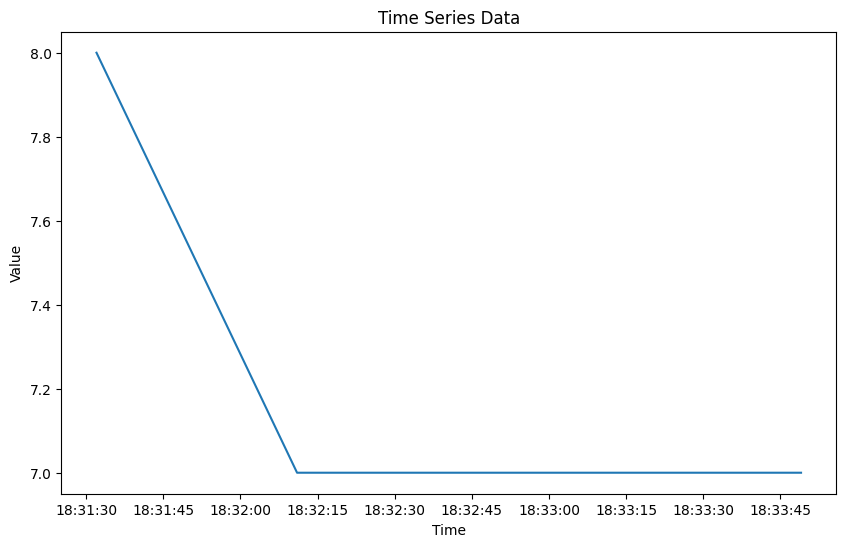

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
14:57:44 - cmdstanpy - INFO - Chain [1] start proc

                    ds       yhat  yhat_lower  yhat_upper
0  2012-04-03 18:10:39   6.364567    5.691811    7.078077
1  2012-04-03 18:16:10   6.745721    6.044220    7.526469
2  2012-04-03 18:47:11   8.888708    8.139445    9.608887
3  2012-04-03 18:57:11   9.579623    8.844959   10.341315
4  2012-04-03 19:07:11  10.270538    9.510313   11.003789
5  2012-04-03 19:17:11  10.961452   10.230162   11.700570
6  2012-04-03 19:27:11  11.652367   10.954214   12.397348
7  2012-04-03 19:37:11  12.343282   11.542363   13.049997
8  2012-04-03 19:47:11  13.034196   12.256152   13.767304
9  2012-04-03 19:57:11  13.725111   13.010027   14.463427
10 2012-04-03 20:07:11  14.416026   13.698883   15.152461
11 2012-04-03 20:17:11  15.106940   14.364107   15.807855
12 2012-04-03 20:27:11  15.797855   15.080350   16.477469


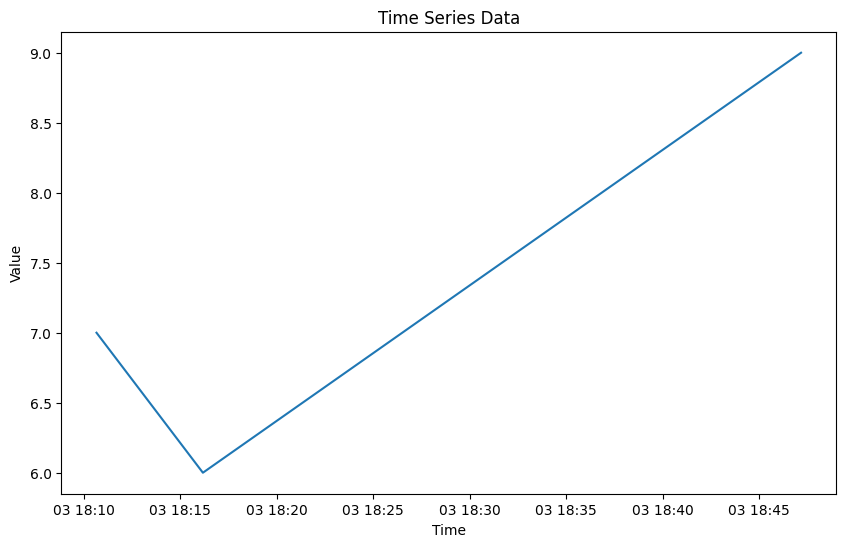

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
14:57:45 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:10:04  7.026508    5.880769    8.140859
1  2012-04-03 18:16:19  7.150668    6.023817    8.121103
2  2012-04-03 18:49:59  7.819480    6.750006    8.900401
3  2012-04-03 18:59:59  8.018136    6.951919    9.093861
4  2012-04-03 19:09:59  8.216793    7.109981    9.303630
5  2012-04-03 19:19:59  8.415450    7.302685    9.579872
6  2012-04-03 19:29:59  8.614107    7.529550    9.732499
7  2012-04-03 19:39:59  8.812764    7.698434    9.915211
8  2012-04-03 19:49:59  9.011421    7.936982   10.095095
9  2012-04-03 19:59:59  9.210078    8.094091   10.283381
10 2012-04-03 20:09:59  9.408734    8.250960   10.489937
11 2012-04-03 20:19:59  9.607391    8.458555   10.723318
12 2012-04-03 20:29:59  9.806048    8.688935   10.878175


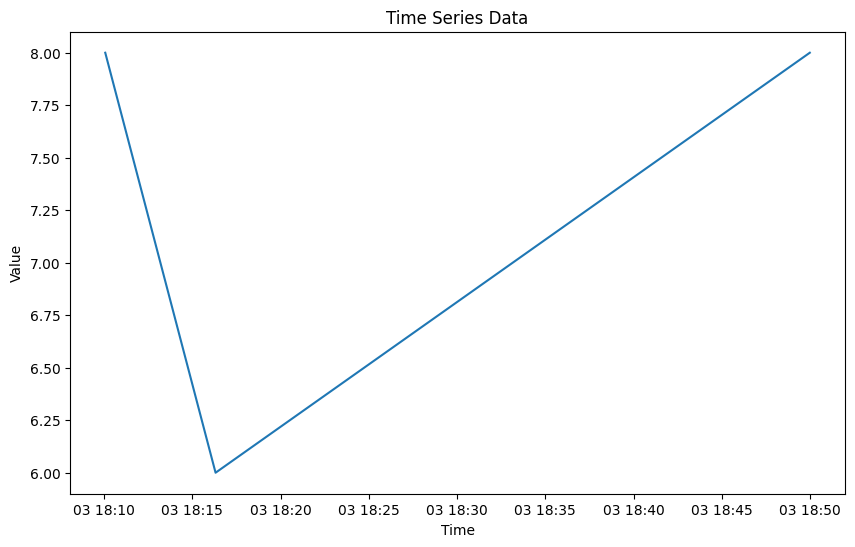

In [ ]:
def predict(target_loc):

    filtered_data = df[df['location'] == target_loc]

    

    filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
    filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
    grouped = filtered_data.groupby(["_period"]).size().rename("count").reset_index()
    model = Prophet()

    # Fit the model
    model.fit(filtered_data.rename(columns={"appear_time": "ds", "reward": "y"}))

    # Create future dates dataframe 
    future = model.make_future_dataframe(periods=10, freq='10min') 

    # Make predictions 
    forecast = model.predict(future) 
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_data["appear_time"], filtered_data["reward"])
    plt.title('Time Series Data')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.show()

for loc in target_locs:
    predict(loc)

In [ ]:
target_loc = 43

filtered_data = df[df[loc] == target_loc]

print(filtered_data)
print(type(filtered_data))

filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
grouped = filtered_data.groupby(["_period"]).size().rename("count").reset_index()
model = Prophet()

# Fit the model
model.fit(filtered_data.rename(columns={"appear_time": "ds", "reward": "y"}))

# Create future dates dataframe 
future = model.make_future_dataframe(periods=10, freq='10min') 

# Make predictions 
forecast = model.predict(future) 
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
plt.figure(figsize=(10, 6))
plt.plot(filtered_data["appear_time"], filtered_data["reward"])
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [ ]:
import sys
!{sys.executable} -m pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 4.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 7.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 7.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 8.1 MB/s eta 0:00:00a 0:00:01
--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File

In [ ]:
# Filter data for a specific location
# Using one of the locations with high check-in counts from the duplicates DataFrame
target_lat = 40.750795
target_lon = -73.993576

# Allow for some small variation in coordinates (within ~10 meters)
tolerance = 0.0001

# Filter the data
filtered_data = df[
    (df[lat_col].between(target_lat - tolerance, target_lat + tolerance)) & 
    (df[lon_col].between(target_lon - tolerance, target_lon + tolerance))
]

# Save to new CSV file
filtered_data.to_csv('filtered_location_data.csv', index=False)

print(f"Found {len(filtered_data)} records for location (lat={target_lat}, lon={target_lon})")
print(f"Data saved to filtered_location_data.csv")

Found 1156 records for location (lat=40.750795, lon=-73.993576)
Data saved to filtered_location_data.csv


c:\Users\cbassem\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\cbassem\AppData\Local\Temp\ipykernel_22072\3802657395.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[ts_col] = pd.to_datetime(data[ts_col], errors="coerce")
C:\Users\cbassem\AppData\Local\Temp\ipykernel_22072\3802657395.py:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data["_period"] = data[ts_col].dt.to_period("D").dt.to_timestamp()
17:21:03 - cmdstanpy - INFO - Chain [1] start processing
17:21:04 - cmdstanpy - INFO - Chain [1] done processing


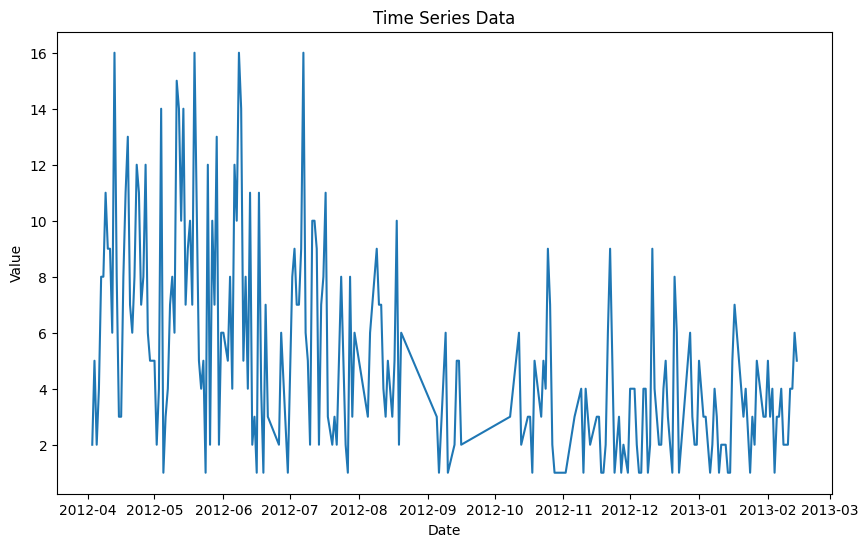

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# data = pd.read_csv('filtered_location_data.csv')
# ts_col = data.columns[7]
# data[ts_col] = pd.to_datetime(data[ts_col], errors="coerce")

# data["_period"] = data[ts_col].dt.to_period("D").dt.to_timestamp()
# grouped = data.groupby(["_period"]).size().rename("count").reset_index()

# Initialize the model
model = Prophet()

# Fit the model
# model.fit(grouped.rename(columns={"_period": "ds", "count": "y"}))

# Create future dates dataframe 
future = model.make_future_dataframe(periods=20) # 90 days into the future, depends on your choice

# Make predictions 
forecast = model.predict(future) 

# View the forecast 
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

plt.figure(figsize=(10, 6))
plt.plot(grouped["_period"], grouped["count"])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

C:\Users\cbassem\AppData\Local\Temp\ipykernel_17732\2593786689.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[ts_col] = pd.to_datetime(data[ts_col], errors="coerce")
C:\Users\cbassem\AppData\Local\Temp\ipykernel_17732\2593786689.py:13: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data["_period"] = data[ts_col].dt.to_period("D").dt.to_timestamp()


Root Mean Squared Error: 2.482001268243581


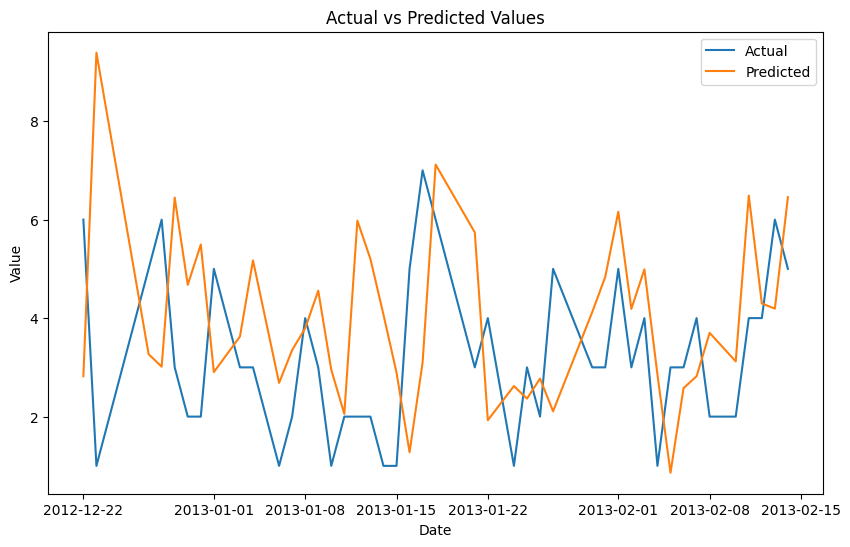

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
data = pd.read_csv('filtered_location_data.csv')
data = pd.read_csv('filtered_location_data.csv')
ts_col = data.columns[7]
data[ts_col] = pd.to_datetime(data[ts_col], errors="coerce")

data["_period"] = data[ts_col].dt.to_period("D").dt.to_timestamp()
grouped = data.groupby(["_period"]).size().rename("count").reset_index()
grouped.set_index('_period', inplace=True)

# Create lag features
def create_lag_features(df, lags, target_col):
  for lag in range(1, lags + 1):
    df[f'{target_col}_lag_{lag}'] = df[target_col].shift(lag)
  df.dropna(inplace=True)
  return df

grouped = create_lag_features(grouped, lags=10, target_col='count')
# Split data into features and target
X = grouped.drop(columns=['count'])
y = grouped['count']

# Split data into train and test sets
train_size = int(len(grouped) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# print (X_train)# Initialize the model
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)

# Train the model
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
# Make predictions
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()